# Problem Statement

Use Feature Selection techniques to select relevant features from the given dataset.   
The data contains 40 columns including 20 relevant features and 20 irrelevant features with respect to the target variable y

`Develop a machine learning based approach to identify the relevant features in the dataset`


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fasteda import fast_eda
from matplotlib import pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, RFE, VarianceThreshold, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv("./data/Dataset.csv")
data.head()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,x_25,x_27,x_28,x_30,x_33,x_38,x_42,x_44,x_45,x_52,x_55,x_57,x_59,x_60,x_62,x_64,x_67,x_68,x_7,x_70,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,0,5099,1,5,156,35,-2,1,40,999,7,30,93,-46,1,14.57,-0.40,26,1272,0.29,2,0.01,-0.56,67,0,0.01,1,1,-0.01,220,237,1,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,1,5191,0,1,164,16,1,5,4,999,5,39,94,-36,0,1.22,-0.04,24,481,-0.80,4,0.00,-0.56,94,0,0.01,1,1,-0.01,871,220,0,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,2,5228,1,0,774,75,1,5,12,999,4,25,94,-42,0,54.26,-0.04,12,722,-0.80,1,0.01,0.19,134,0,0.03,0,1,-0.05,415,130,0,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,3,5228,1,1,747,4,1,5,69,999,3,38,94,-42,0,35.49,-0.40,22,337,-0.80,3,-0.18,0.19,57,0,0.00,1,0,-0.01,794,226,1,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,4,5196,1,5,29,28,0,4,32,999,6,47,93,-42,0,25.40,0.20,4,633,0.29,1,0.01,-0.13,103,0,0.00,0,1,0.06,308,49,0,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0


In [3]:
# removing iirelevant index based column 'Unnamed: 0'
data = data.drop(columns=['Unnamed: 0'])

# Extrapolatory Data Analysis

DataFrame Head:


,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,x_25,x_27,x_28,x_30,x_33,x_38,x_42,x_44,x_45,x_52,x_55,x_57,x_59,x_60,x_62,x_64,x_67,x_68,x_7,x_70,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,5099,1,5,156,35,-2,1,40,999,7,30,93,-46,1,14.57,-0.40,26,1272,0.29,2,0.01,-0.56,67,0,0.01,1,1,-0.01,220,237,1,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,5191,0,1,164,16,1,5,4,999,5,39,94,-36,0,1.22,-0.04,24,481,-0.80,4,0.00,-0.56,94,0,0.01,1,1,-0.01,871,220,0,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,5228,1,0,774,75,1,5,12,999,4,25,94,-42,0,54.26,-0.04,12,722,-0.80,1,0.01,0.19,134,0,0.03,0,1,-0.05,415,130,0,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0


DataFrame Tail:


,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,x_25,x_27,x_28,x_30,x_33,x_38,x_42,x_44,x_45,x_52,x_55,x_57,x_59,x_60,x_62,x_64,x_67,x_68,x_7,x_70,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
4116,5099,1,1,478,41,-2,1,25,999,1,27,93,-46,1,4.96,-0.04,4,1386,0.29,2,0.00,-0.56,89,1,0.03,0,1,0.06,636,34,0,0.11,1240,16,64,0.35,210,0.02,0.24,0.93,0
4117,5228,1,0,554,36,1,5,68,999,0,58,93,-36,0,8.95,-0.04,11,618,0.29,1,0.00,-0.08,108,0,0.01,0,1,-0.01,941,88,0,0.11,1152,21,528,-0.31,49,0.02,-0.10,0.21,0
4118,5196,1,0,143,26,0,4,21,999,1,34,93,-42,1,74.67,-0.04,6,952,0.29,1,0.01,-0.13,47,0,0.01,1,0,-0.05,794,250,0,0.11,355,28,175,-0.31,352,0.02,0.24,-0.16,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(4119, 41)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     4119 non-null   int64  
 1   x_109   4119 non-null   int64  
 2   x_113   4119 non-null   int64  
 3   x_12    4119 non-null   int64  
 4   x_124   4119 non-null   int64  
 5   x_127   4119 non-null   int64  
 6   x_144   4119 non-null   int64  
 7   x_16    4119 non-null   int64  
 8   x_18    4119 non-null   int64  
 9   x_2     4119 non-null   int64  
 10  x_25    4119 non-null   int64  
 11  x_27    4119 non-null   int64  
 12  x_28    4119 non-null   int64  
 13  x_30    4119 non-null   int64  
 14  x_33    4119 non-null   float64
 15  x_38   

/Users/abhjha8/kaggle_competitions/venv/lib/python3.10/site-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/Users/abhjha8/kaggle_competitions/venv/lib/python3.10/site-packages/fasteda/__init__.py:91: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(full_info.style.background_gradient(cmap = "Spectral", subset = full_info.columns[:-2])


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
x_1,4119,5166.469,5191,73.589,4964,5099,5191,5228,5228,-1.072894,0.048824
x_109,4119,0.563,1,0.496,0,0,1,1,1,-0.255022,-1.934964
x_113,4119,3.049,5,2.544,0,1,5,6,6,-0.035302,-1.849600
x_12,4119,503.51,497,291.454,0,250,497,760.5,999,0.003407,-1.232274
x_124,4119,50.484,50,28.863,0,26,50,76,100,-0.016202,-1.199079
x_127,4119,-0.123,1,1.469,-3,-2,1,1,1,-0.764648,-1.138337
x_144,4119,3.609,5,1.825,1,1,5,5,5,-0.680661,-1.463990
x_16,4119,34.827,35,20.442,0,17,35,53,70,0.006605,-1.211938
x_18,4119,960.422,999,191.923,0,999,999,999,999,-4.773400,20.785772
x_2,4119,4.993,5,2.898,0,3,5,8,10,0.032210,-1.162238


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



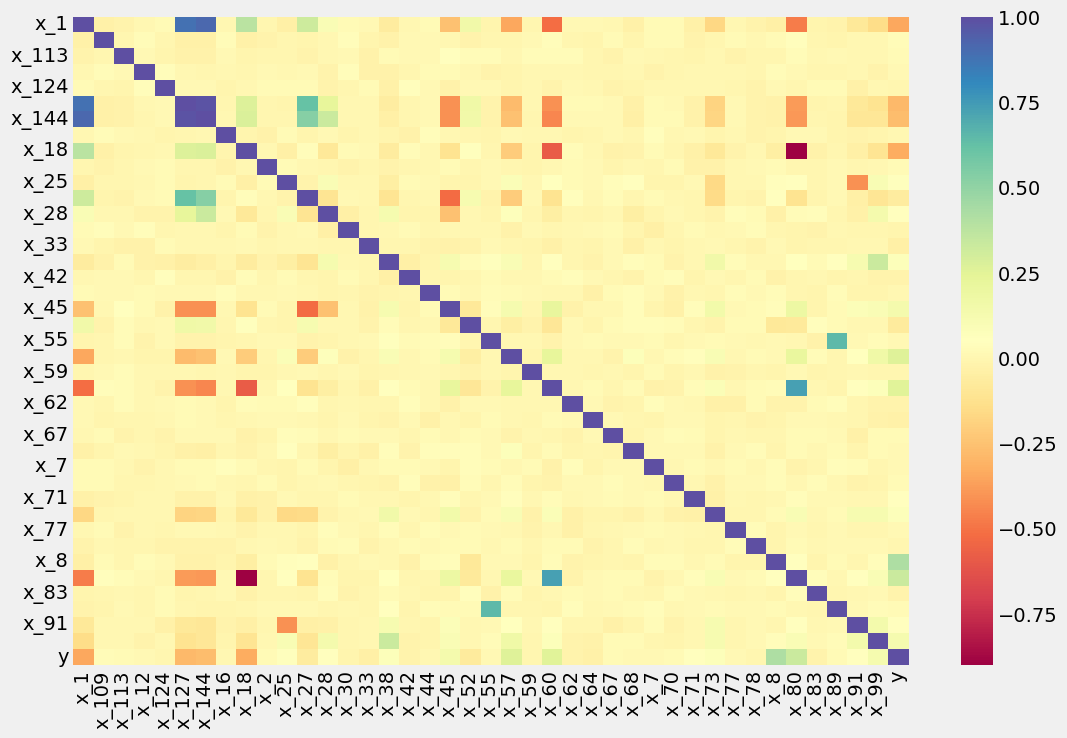

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



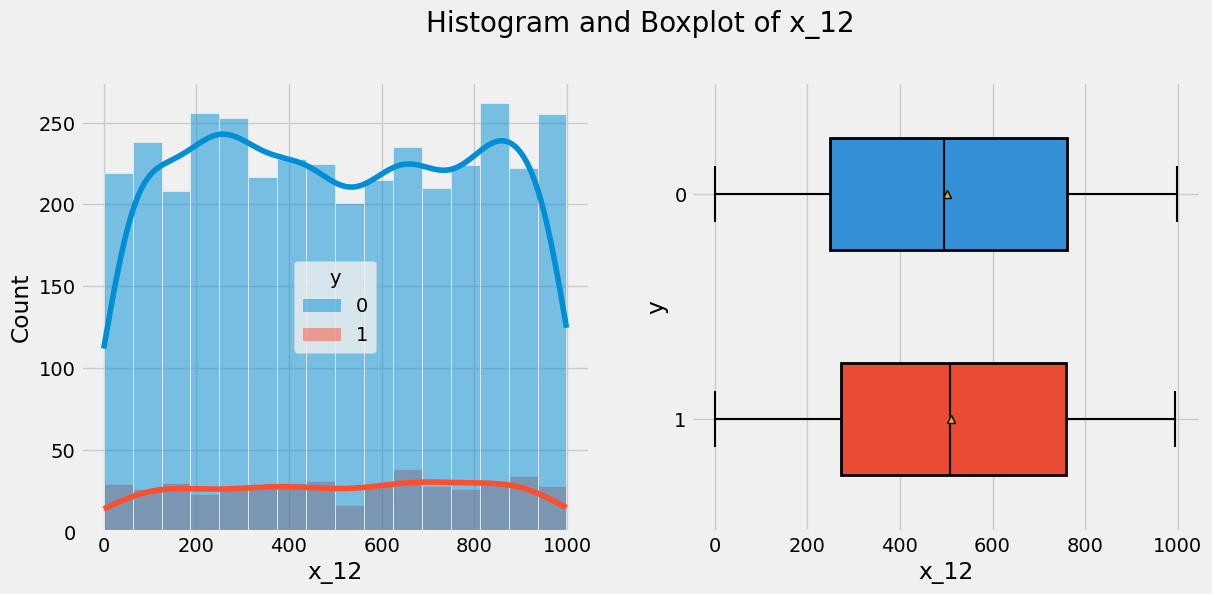

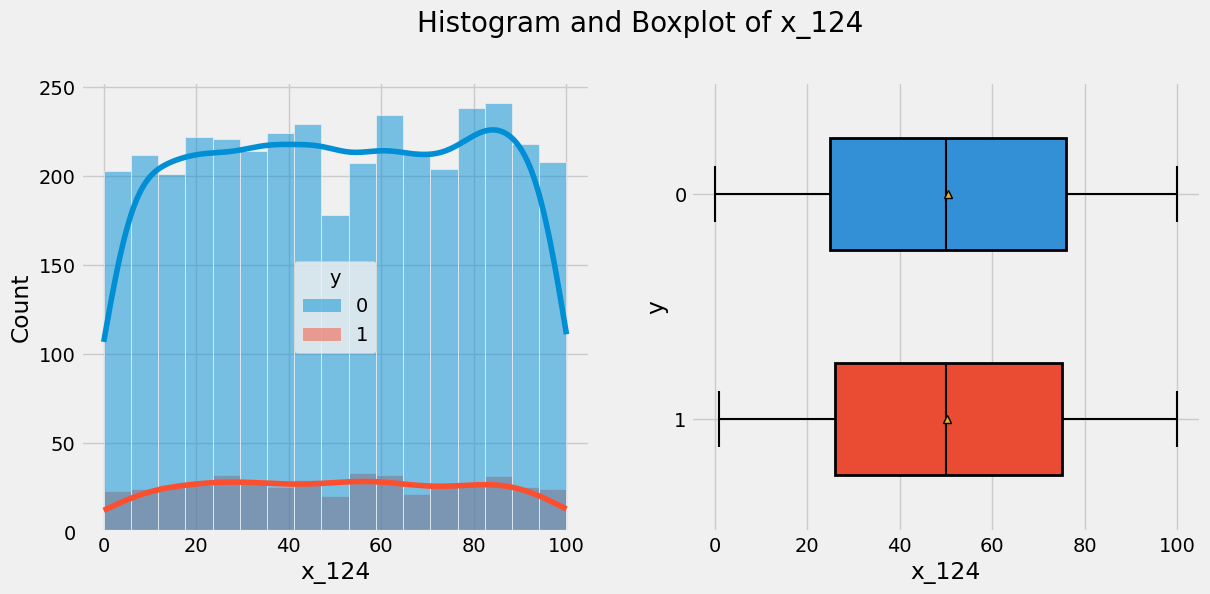

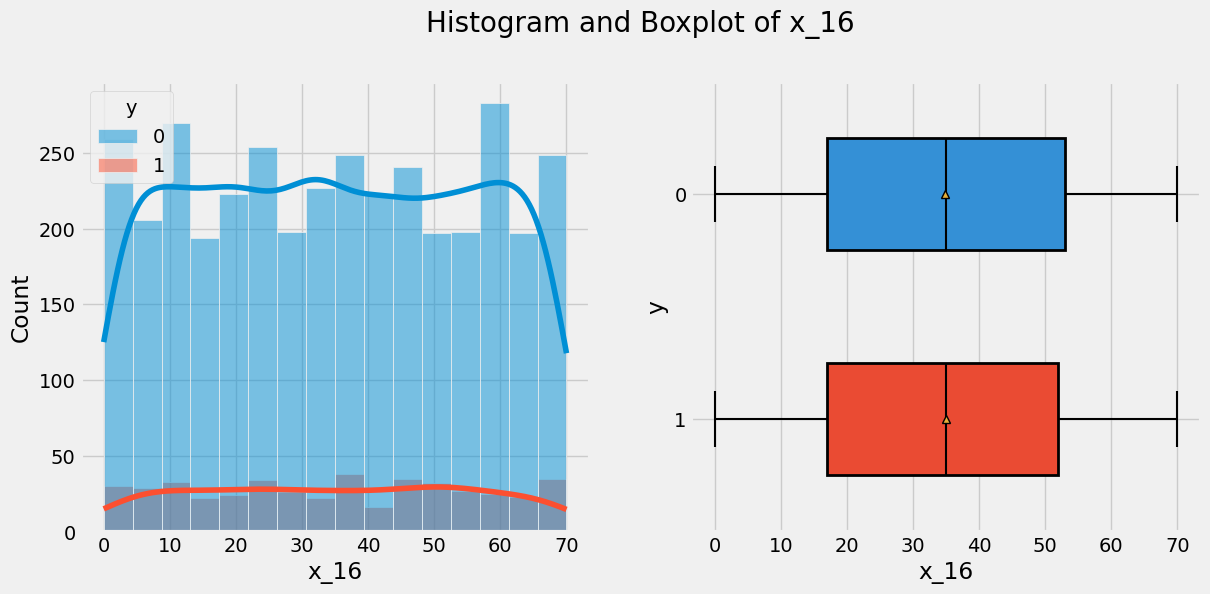

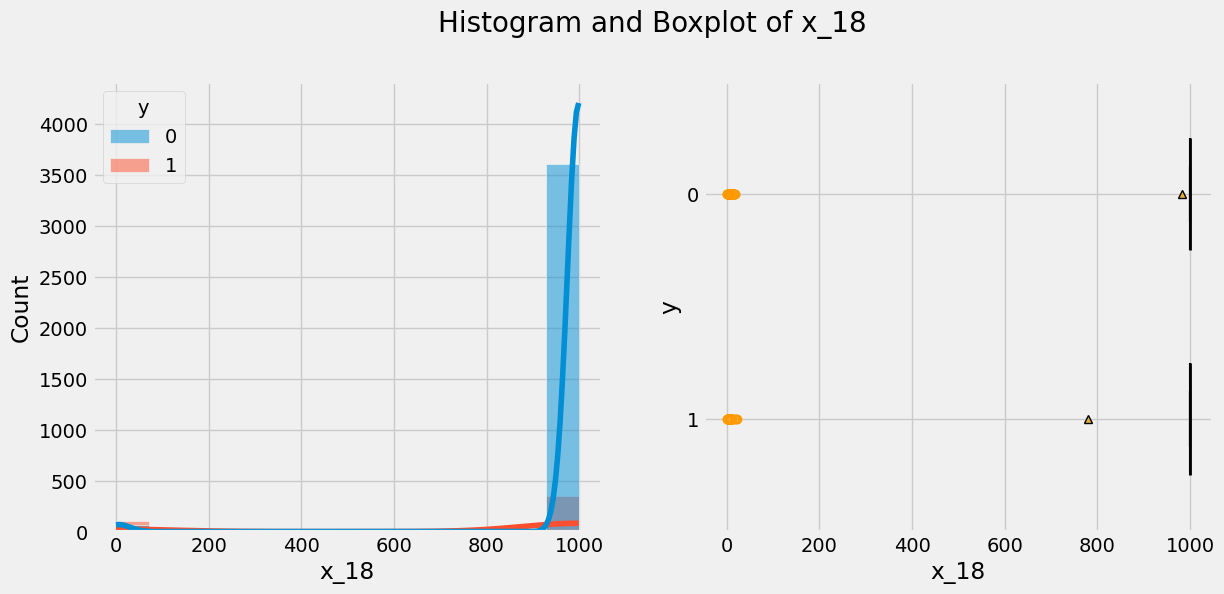

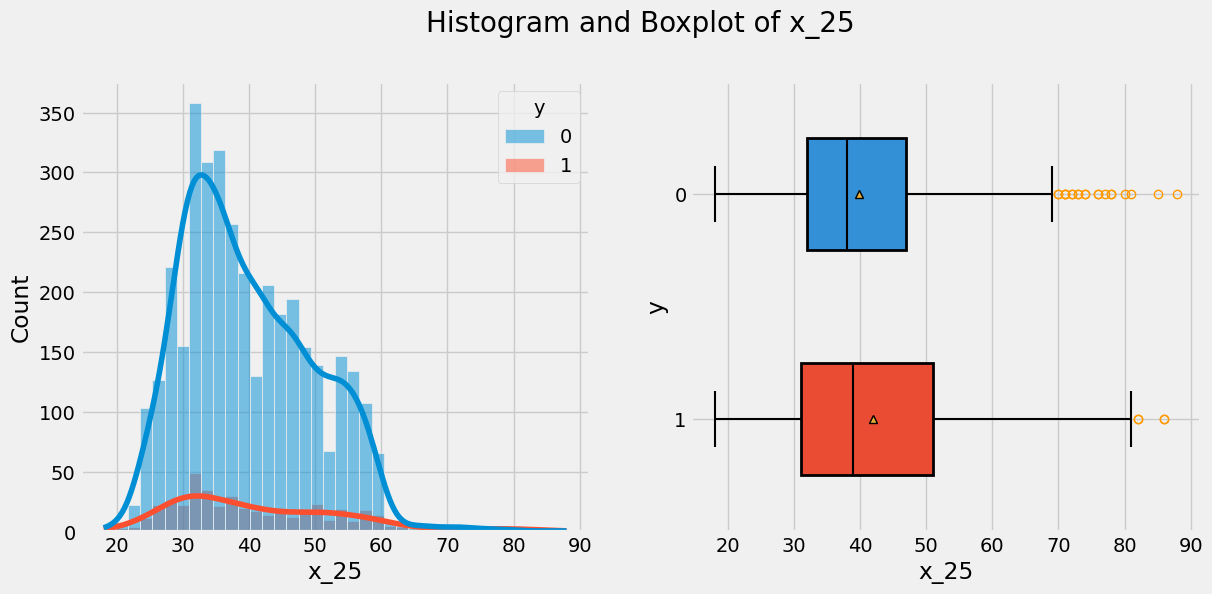

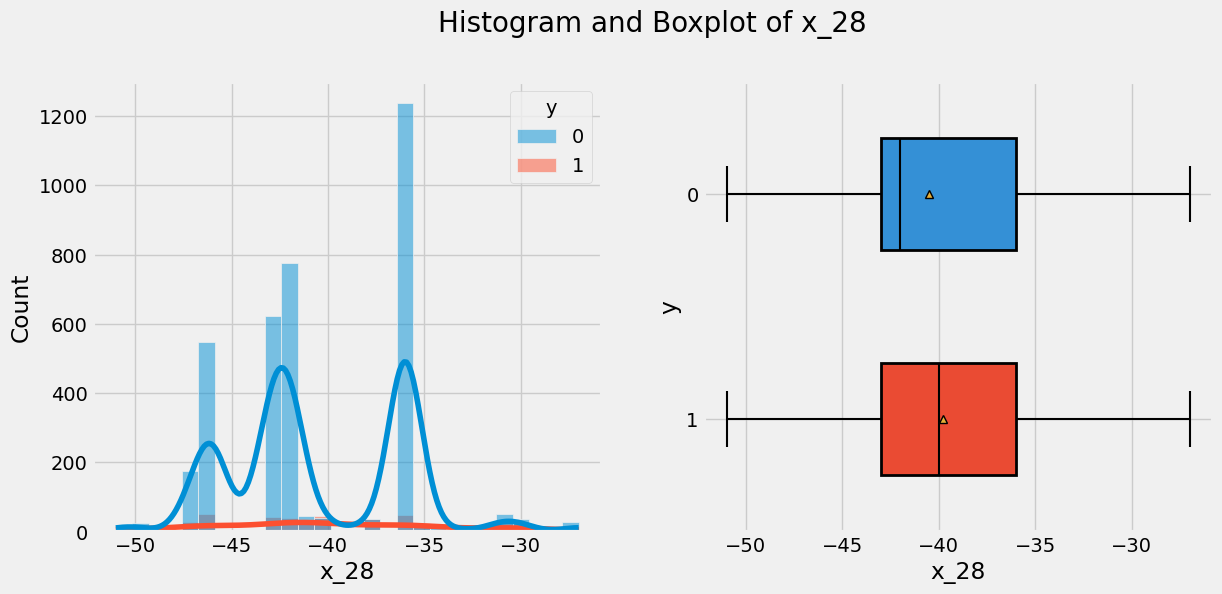

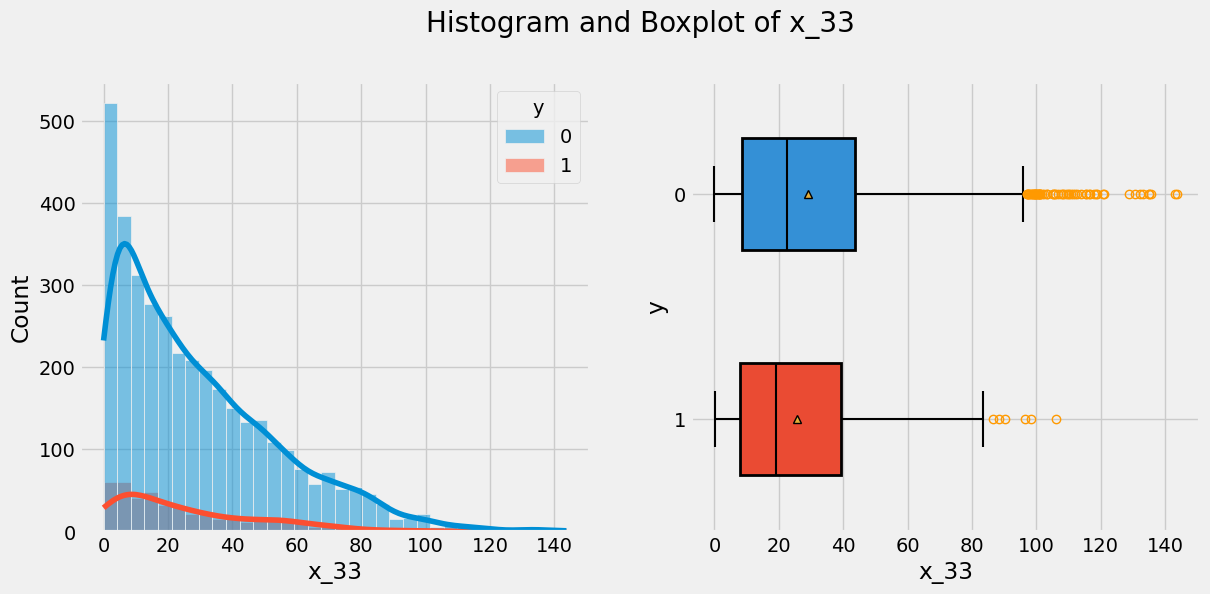

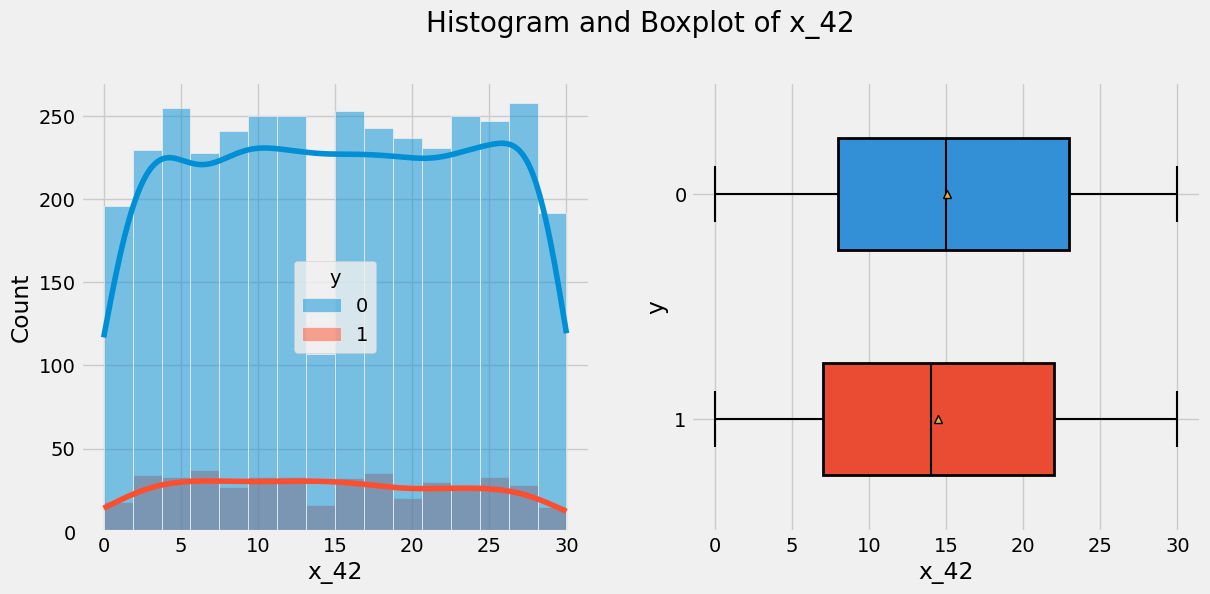

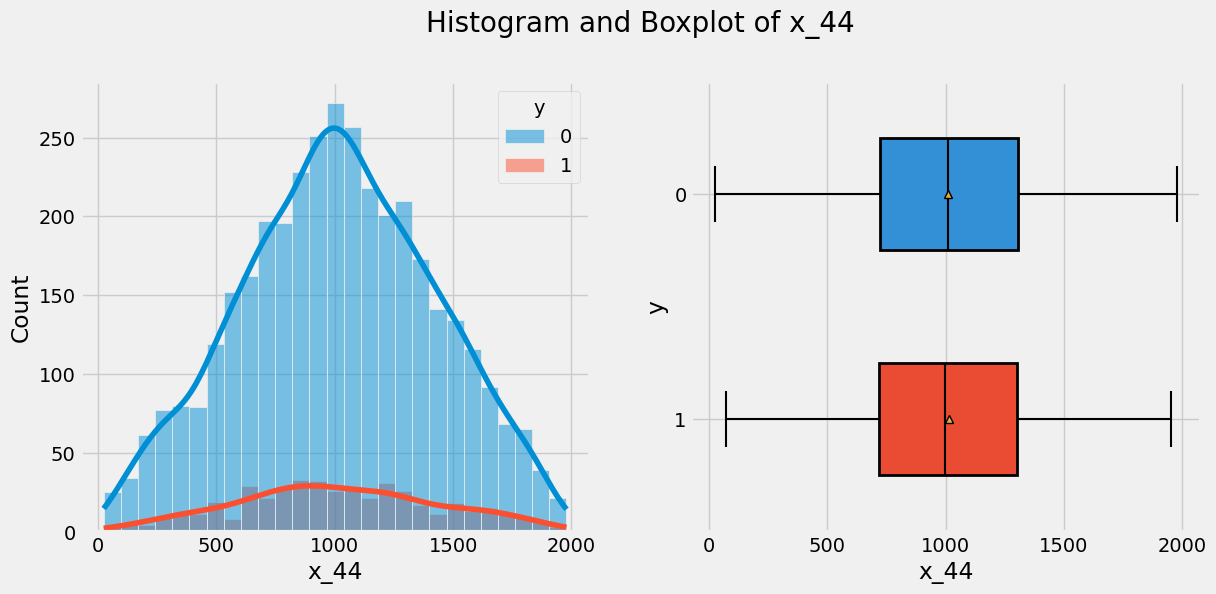

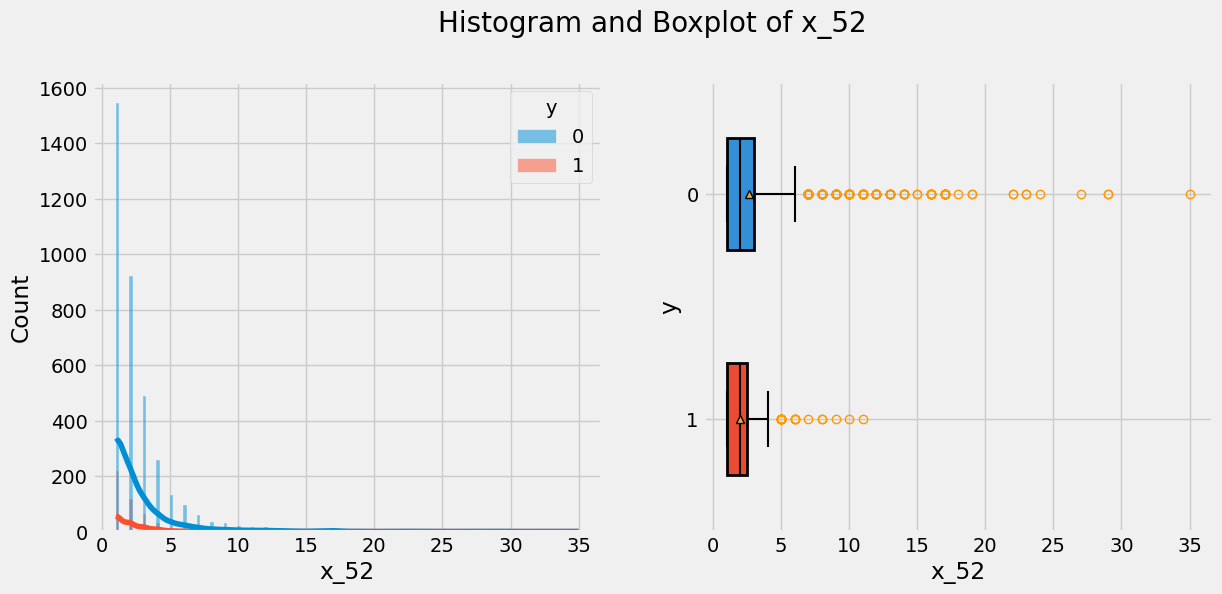

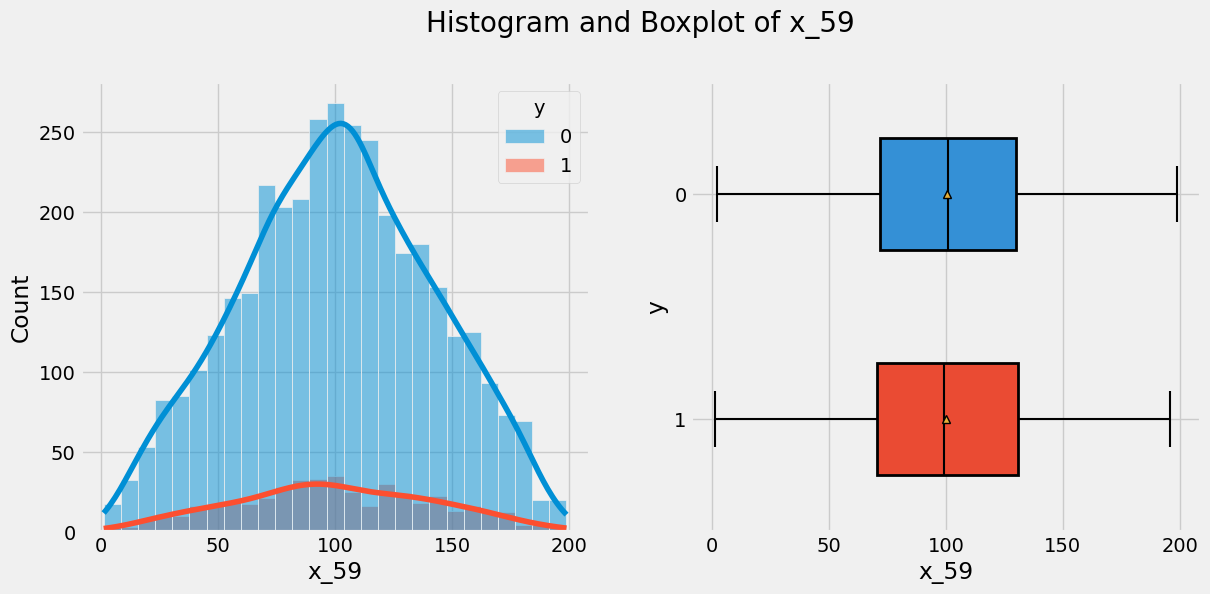

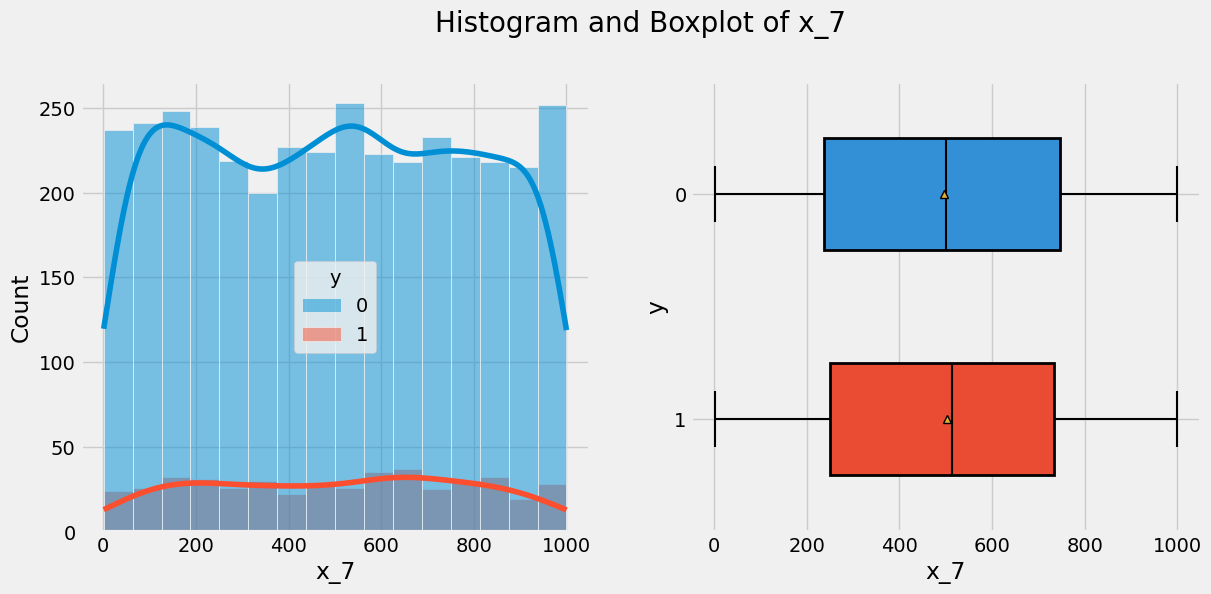

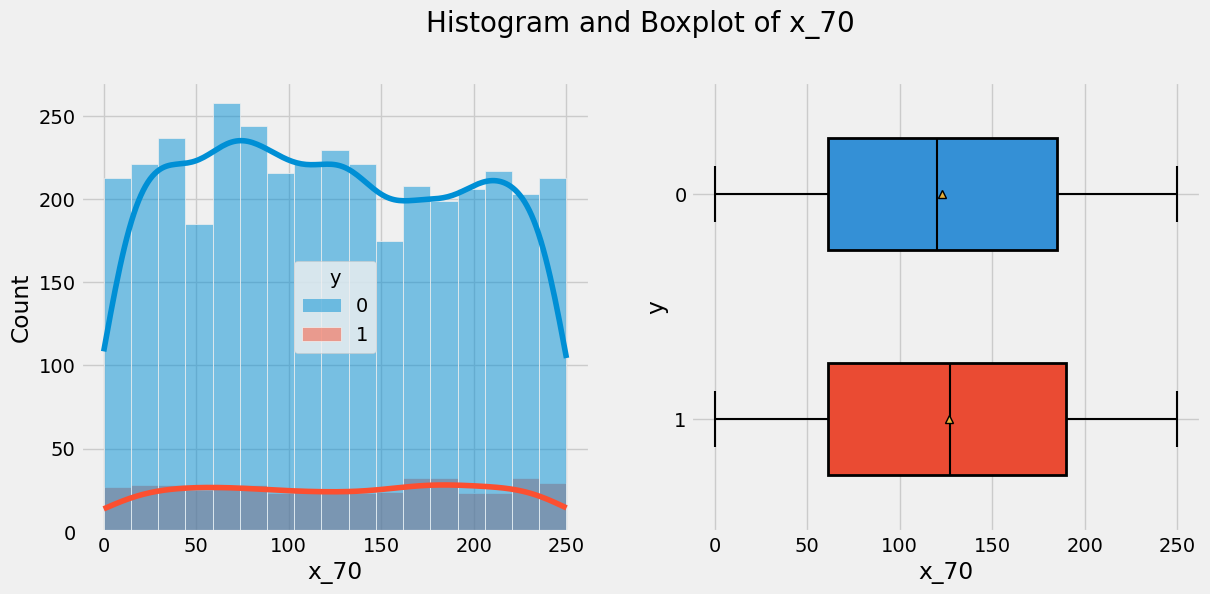

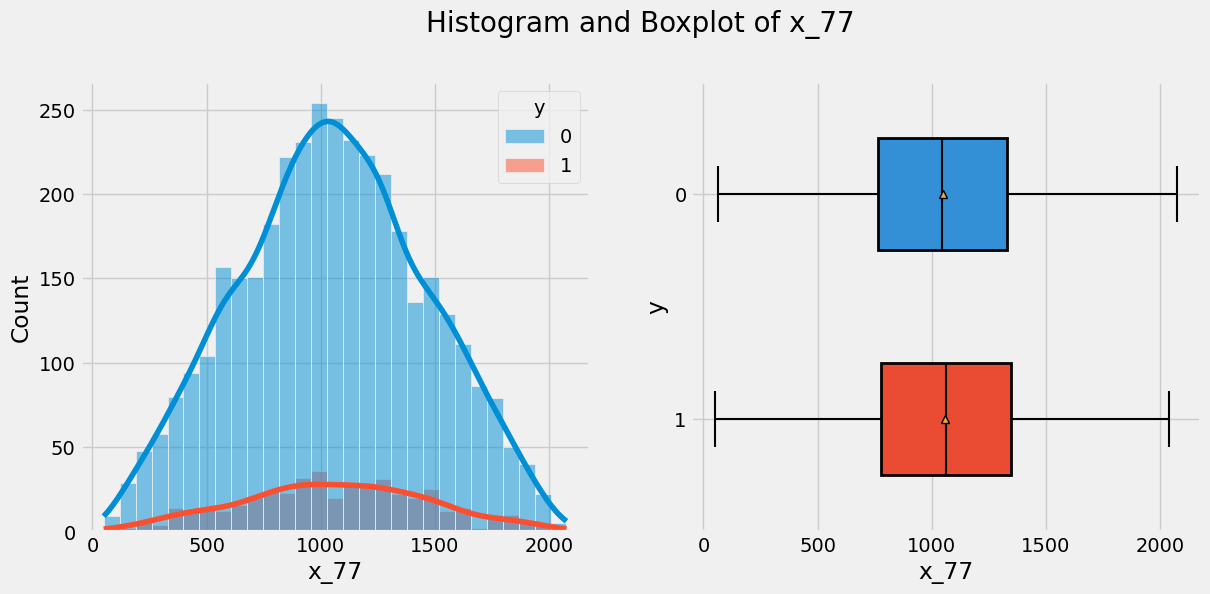

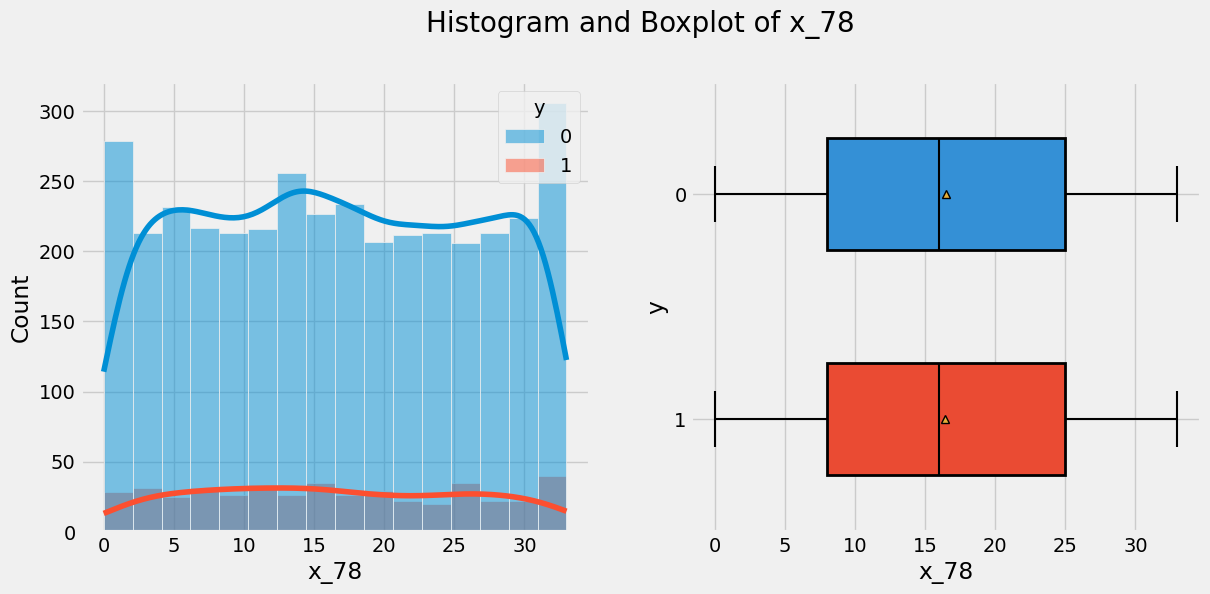

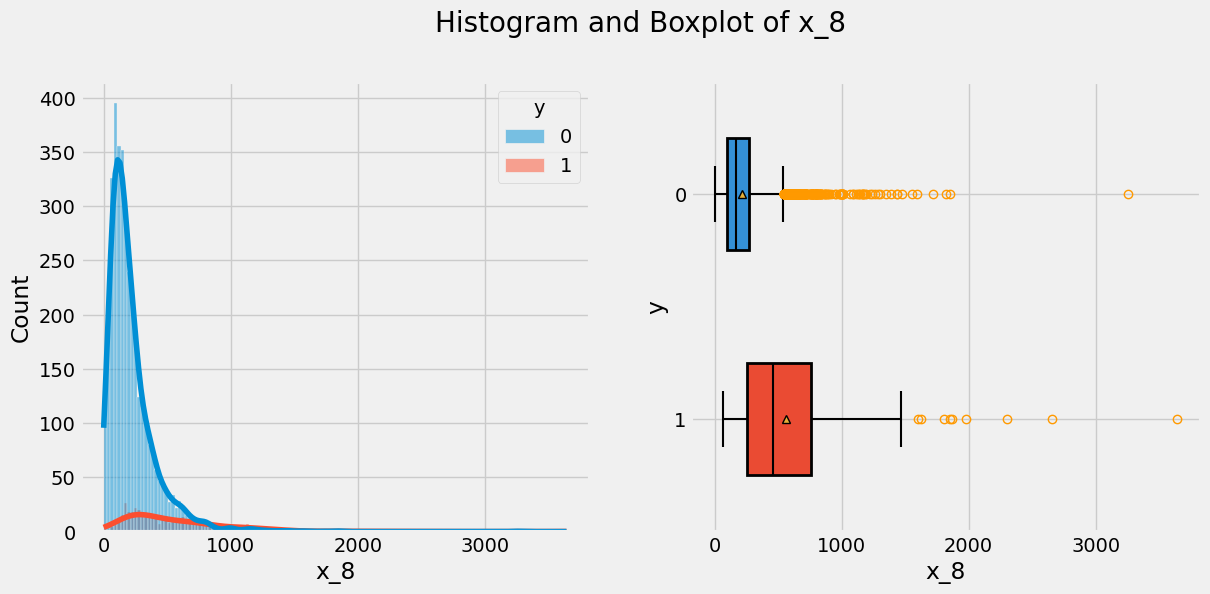

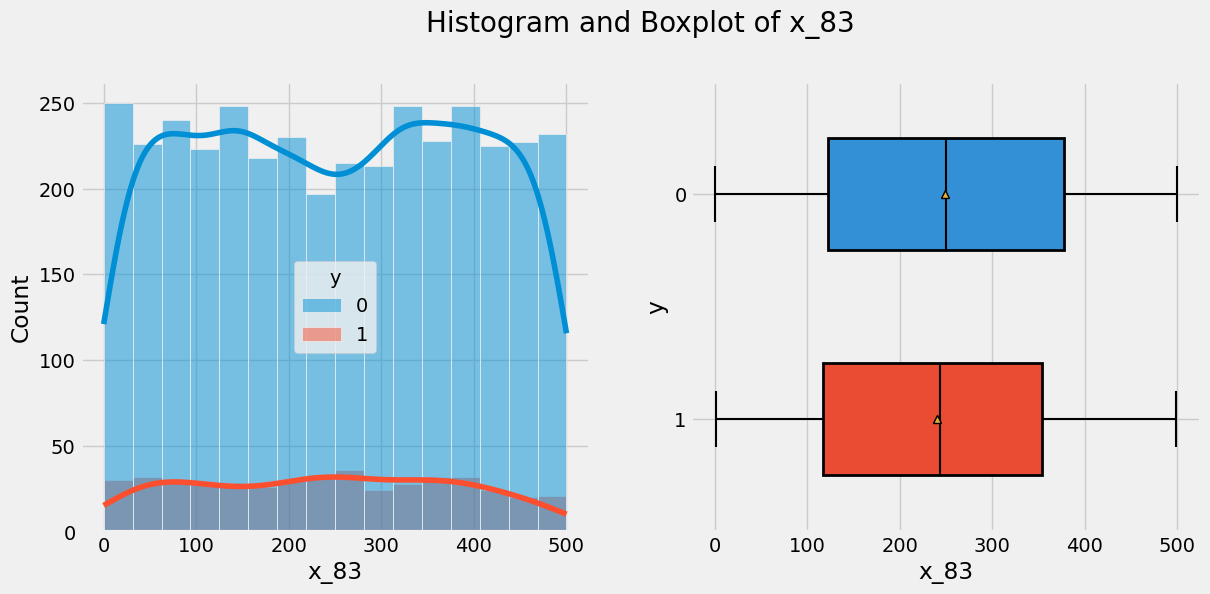

----------------------------------------------------------------------------------------------------
Countplot(s):



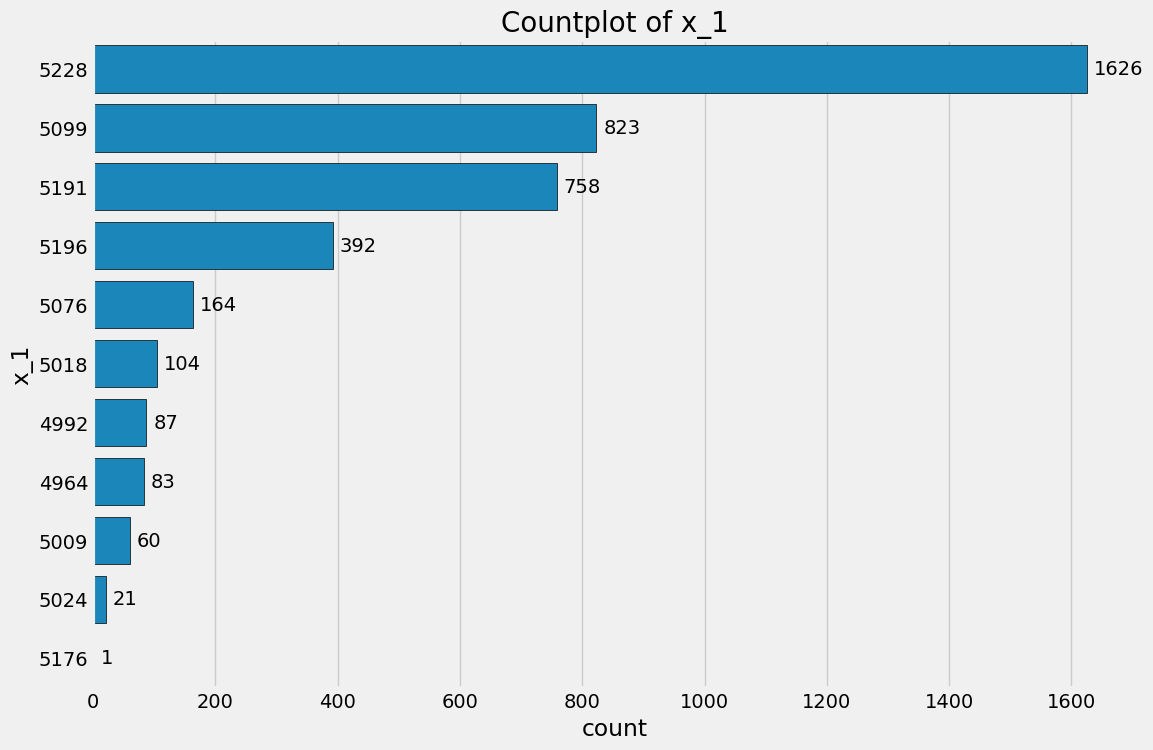

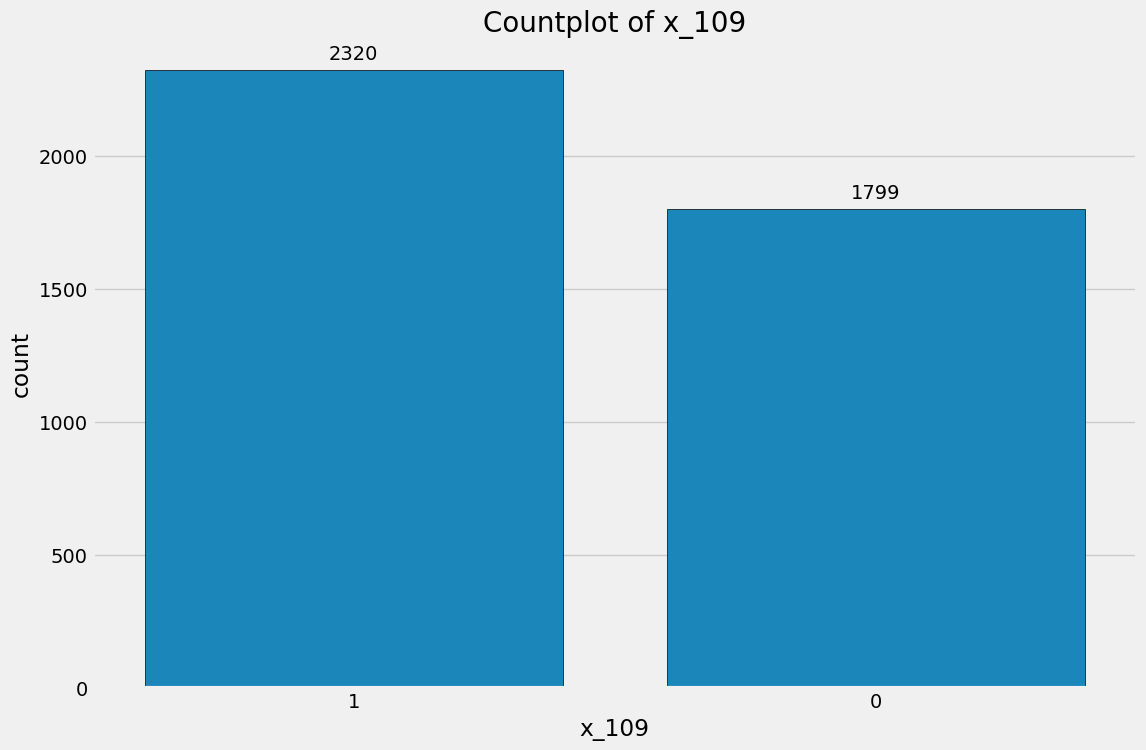

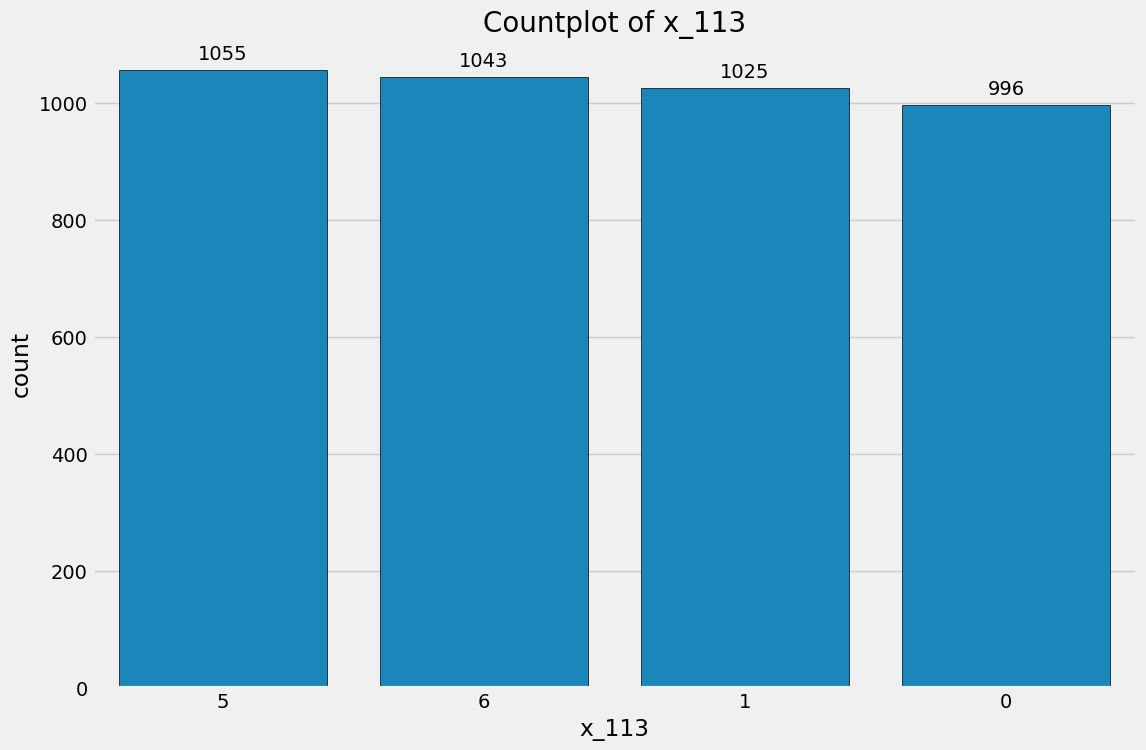

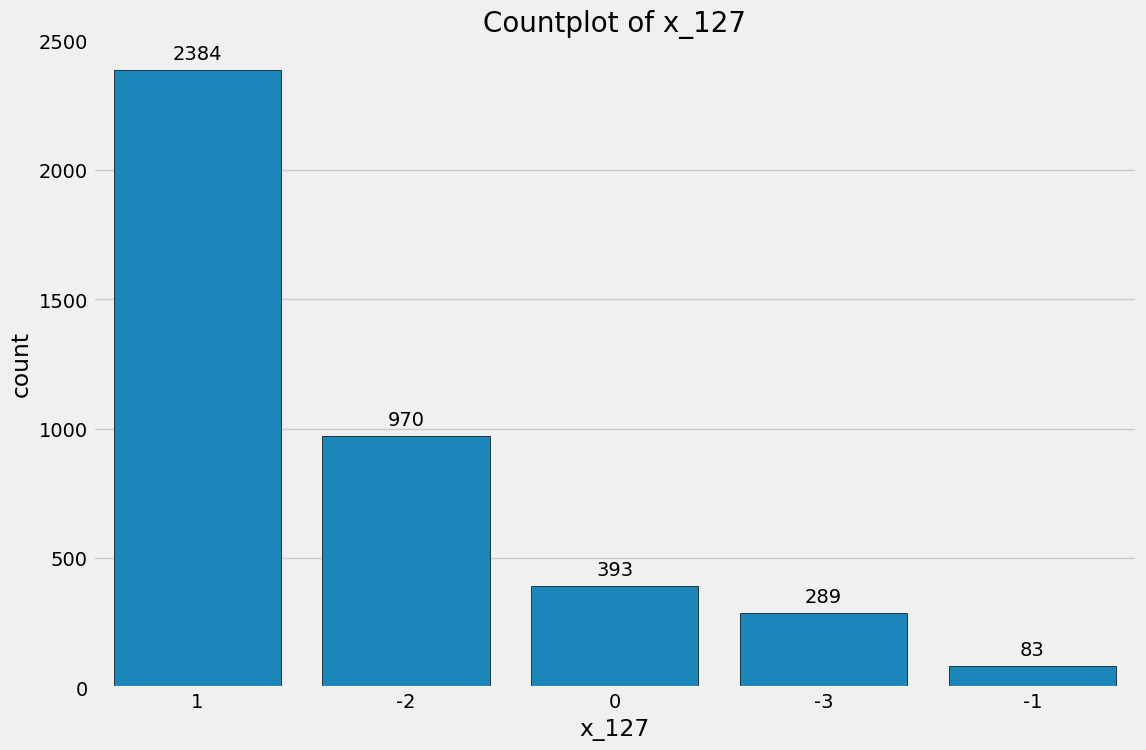

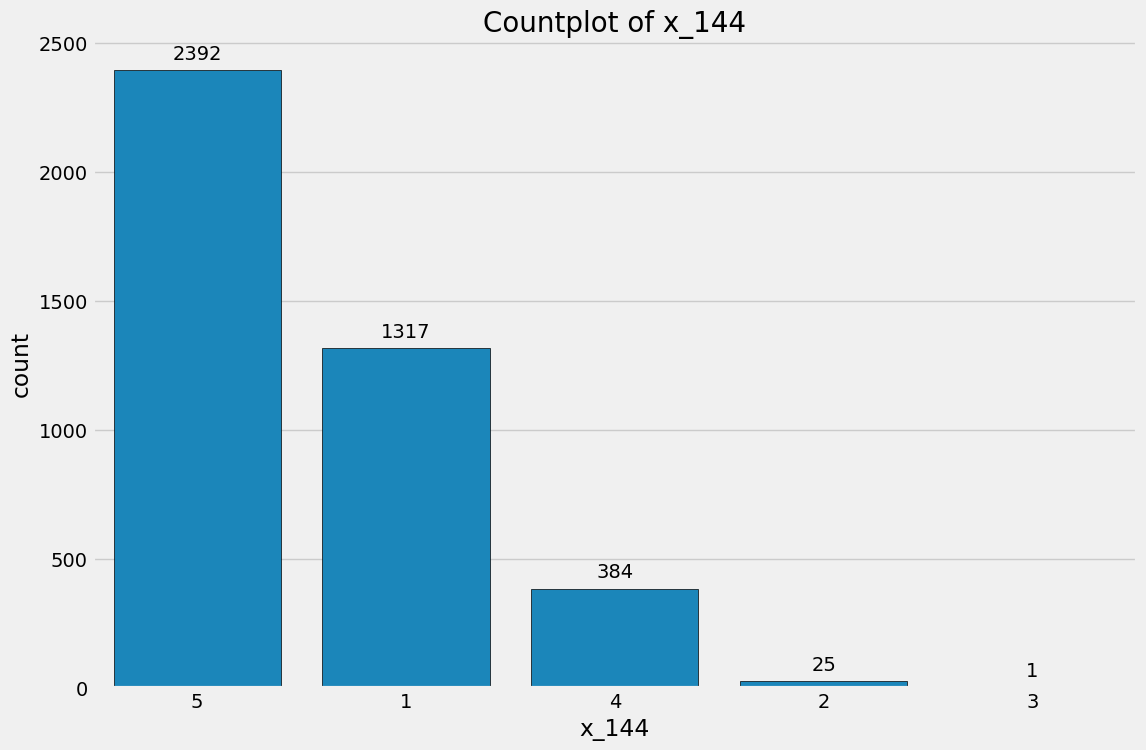

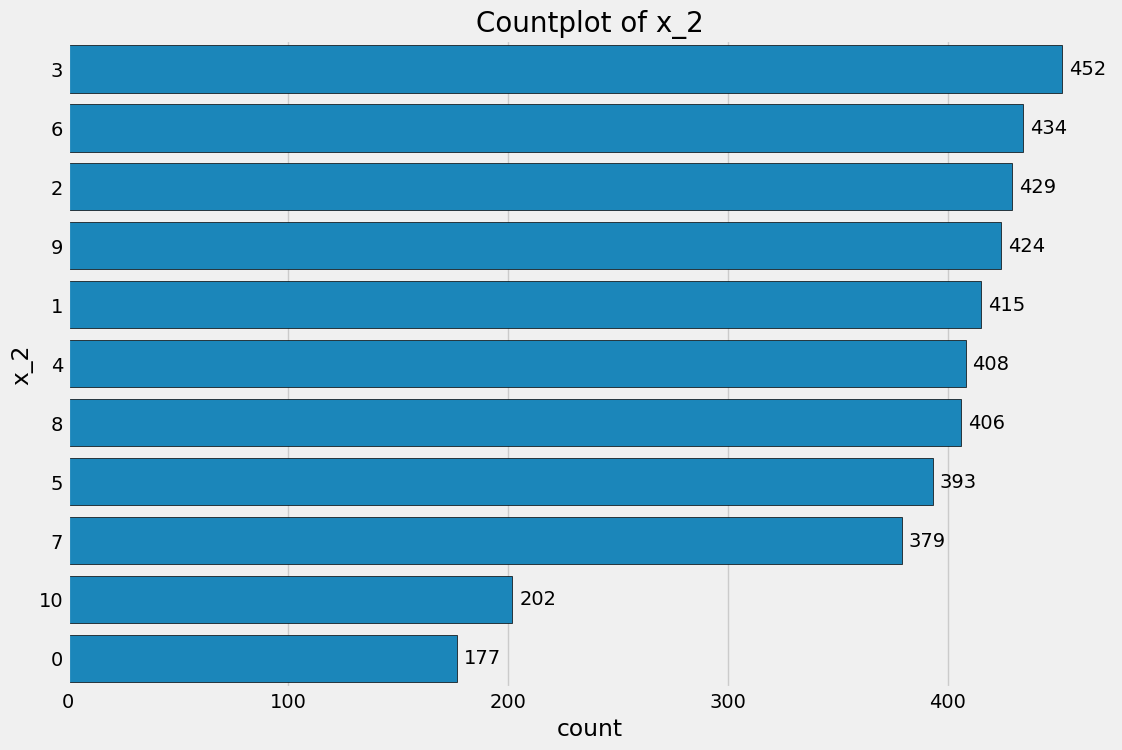

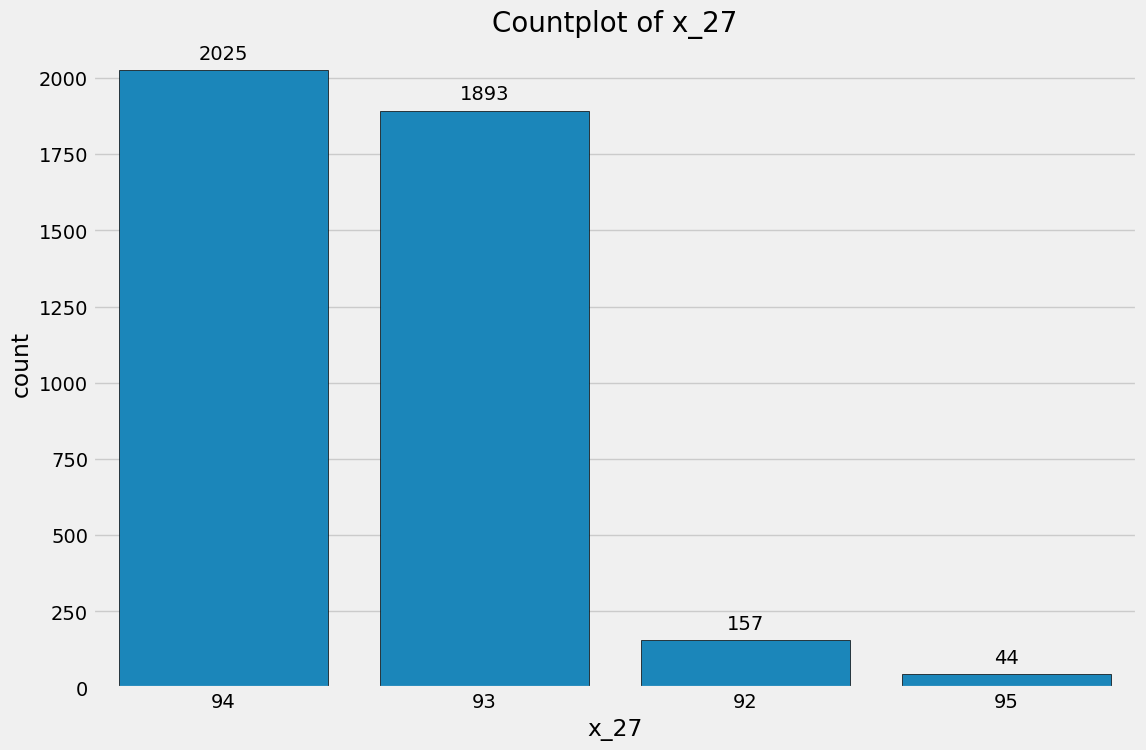

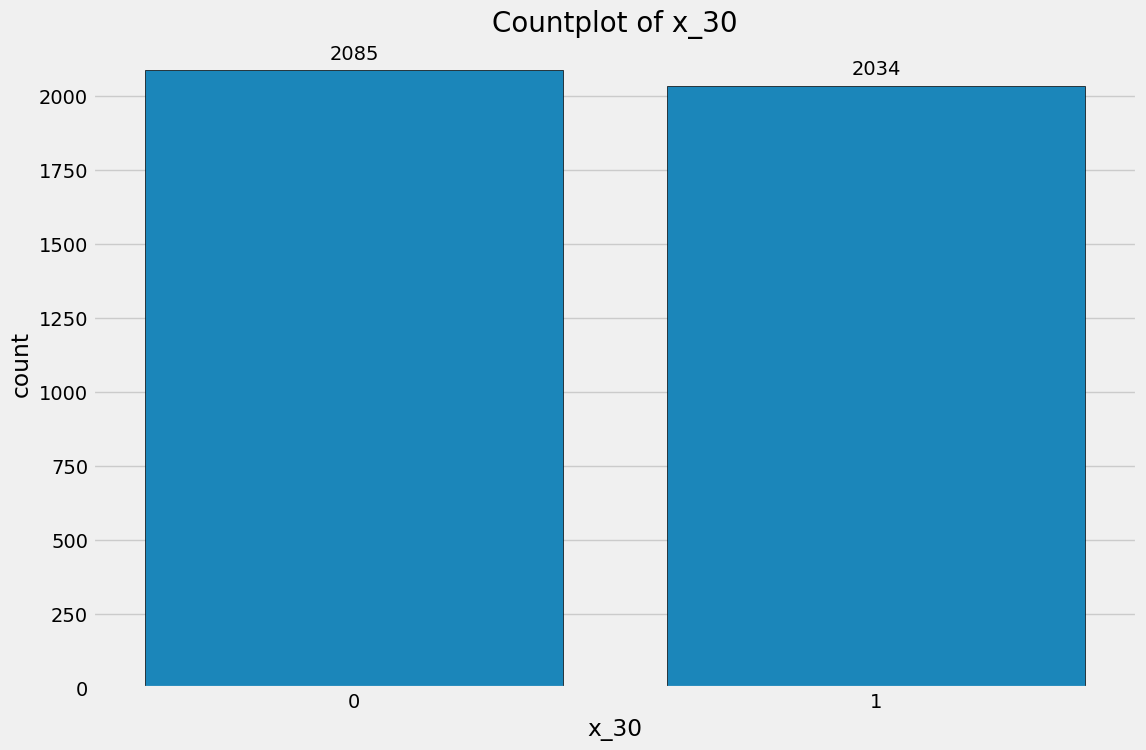

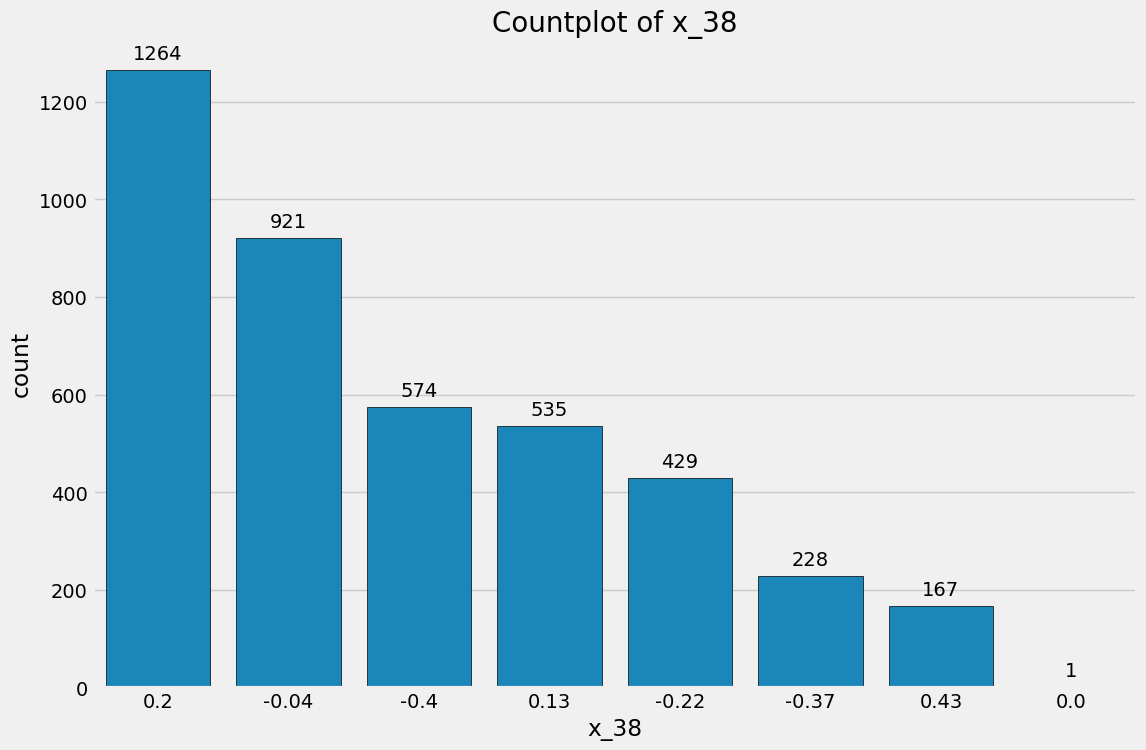

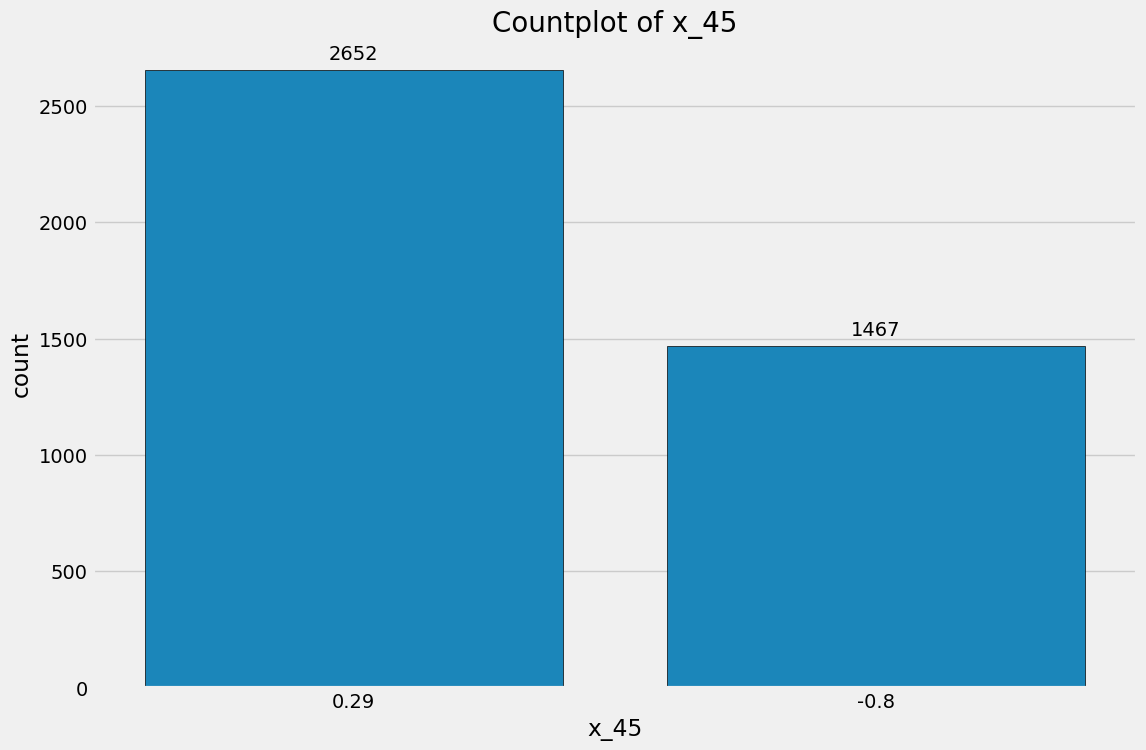

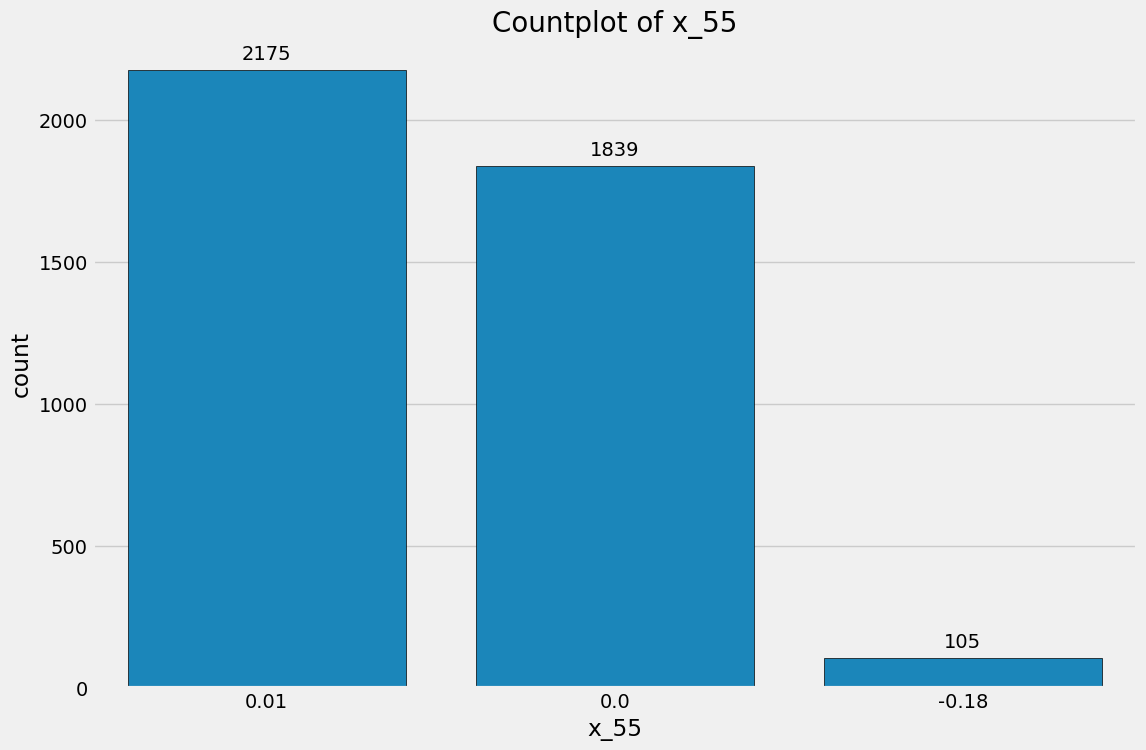

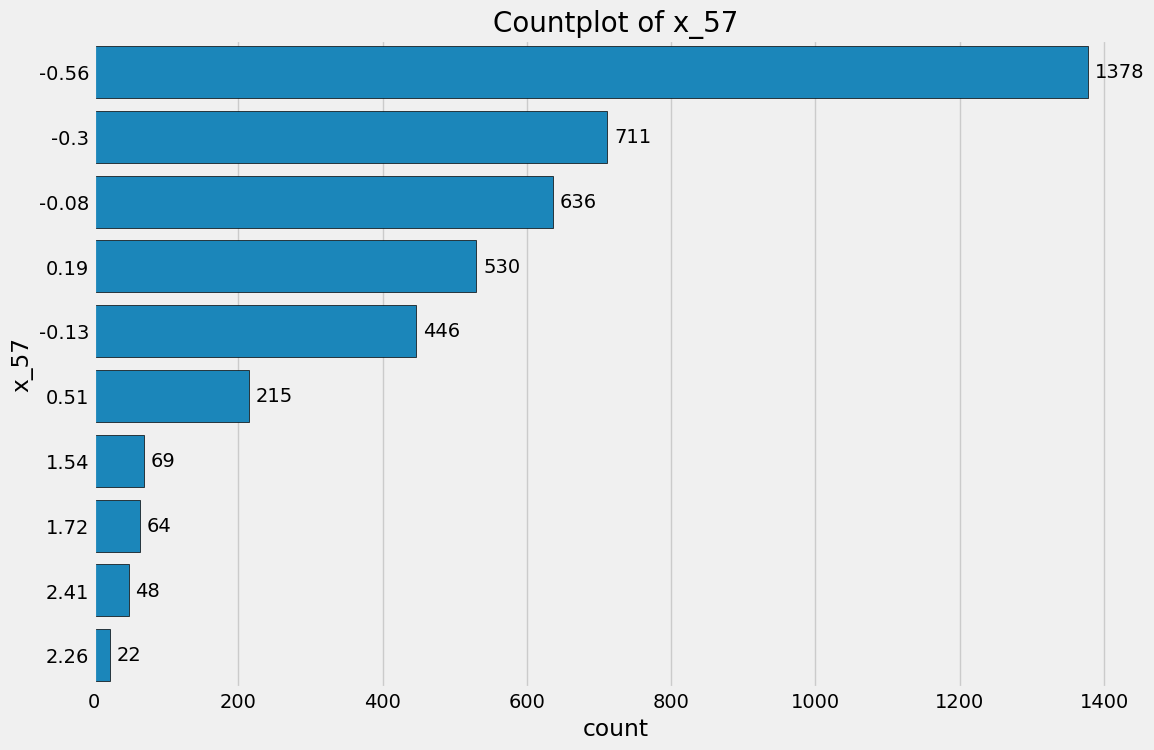

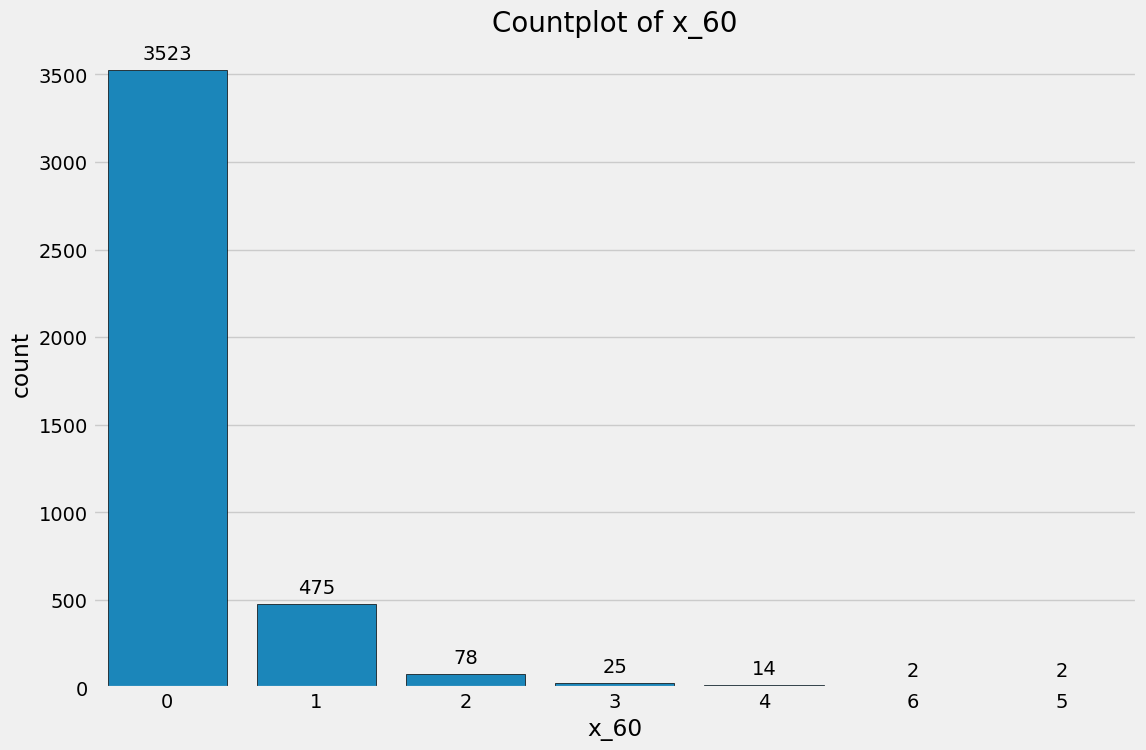

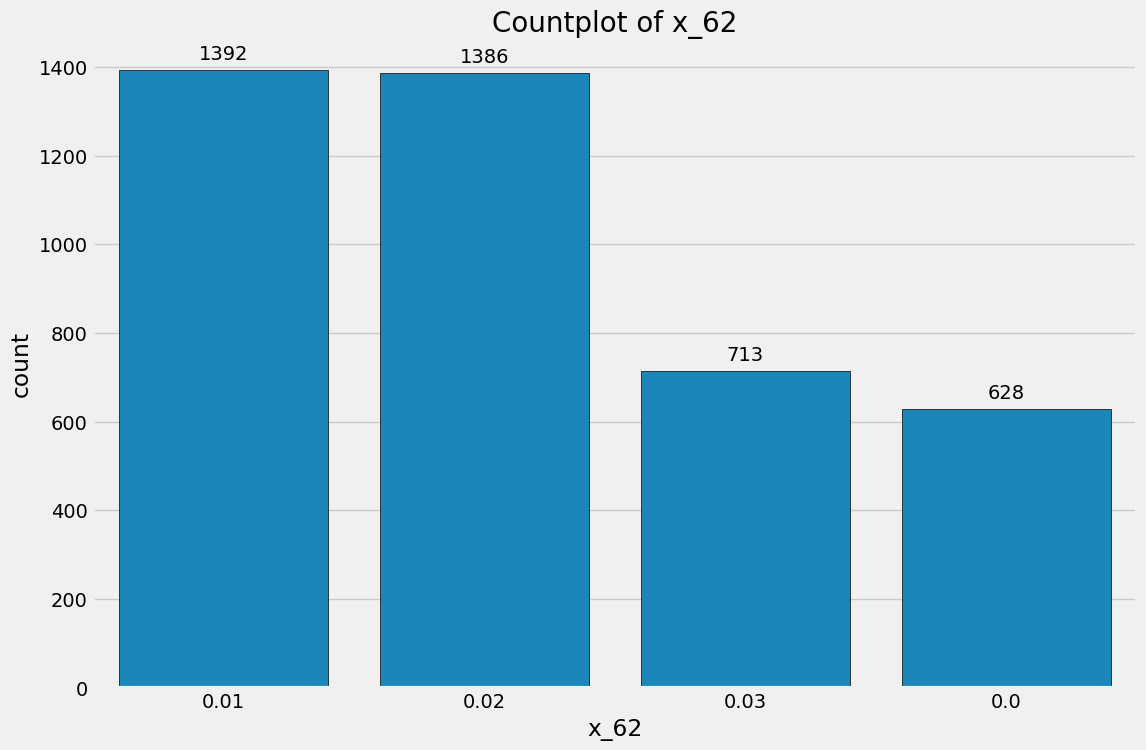

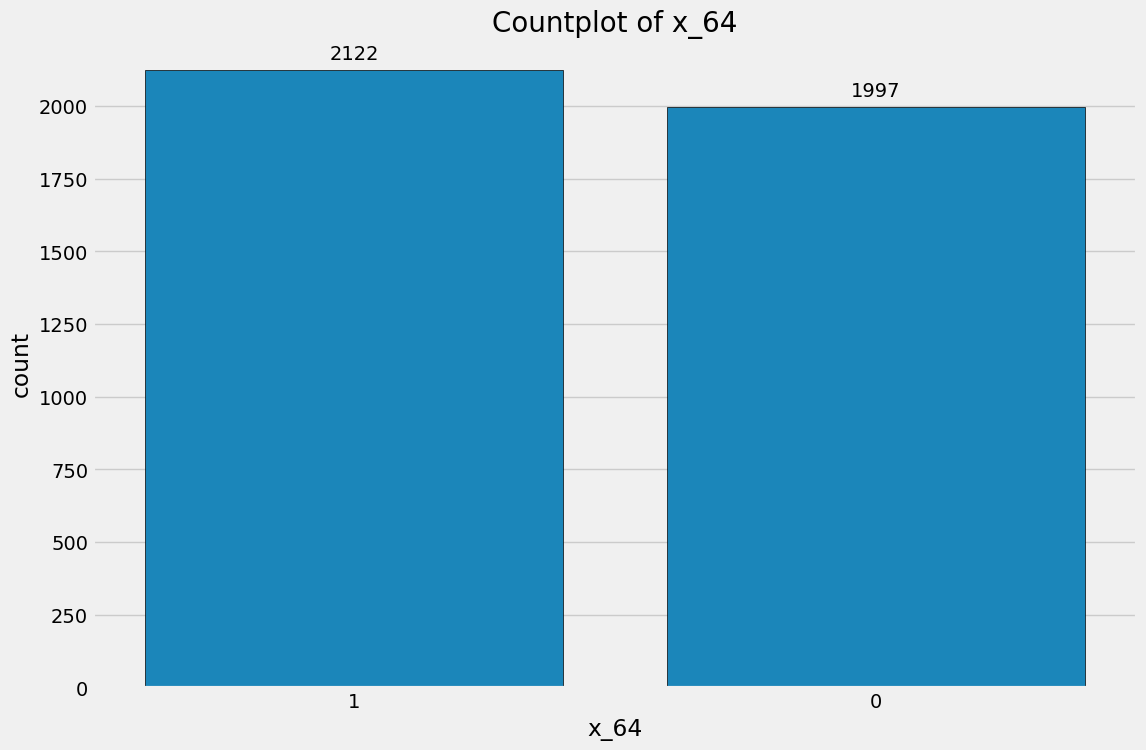

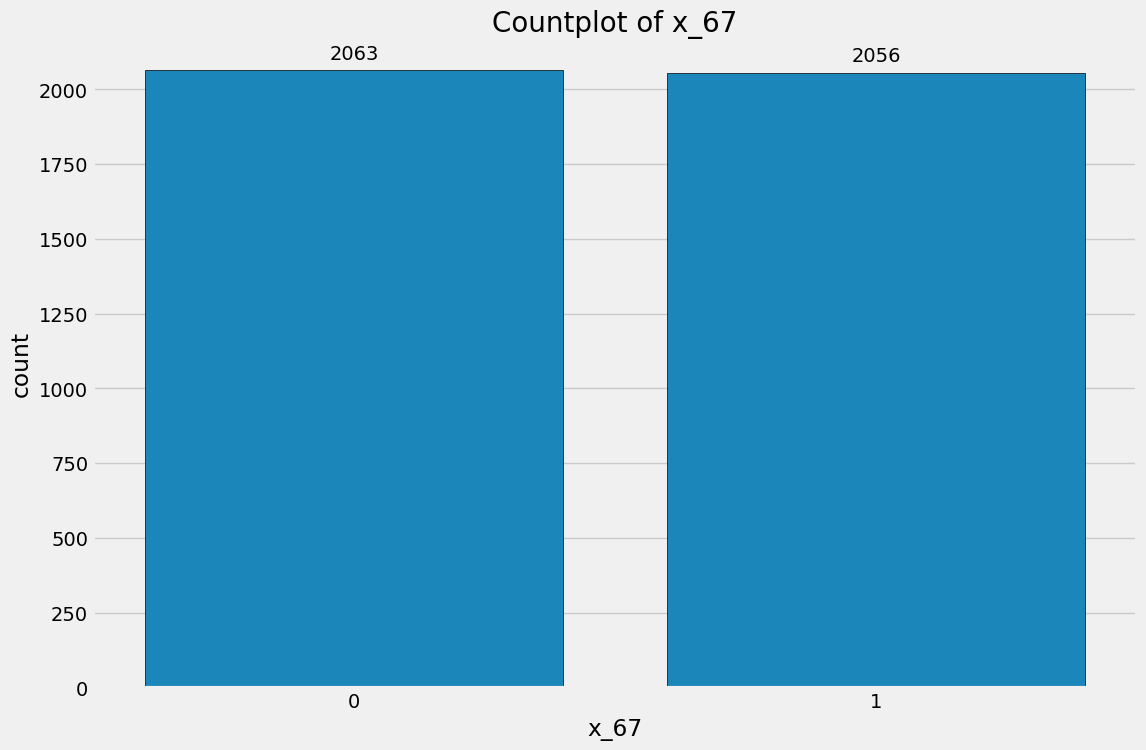

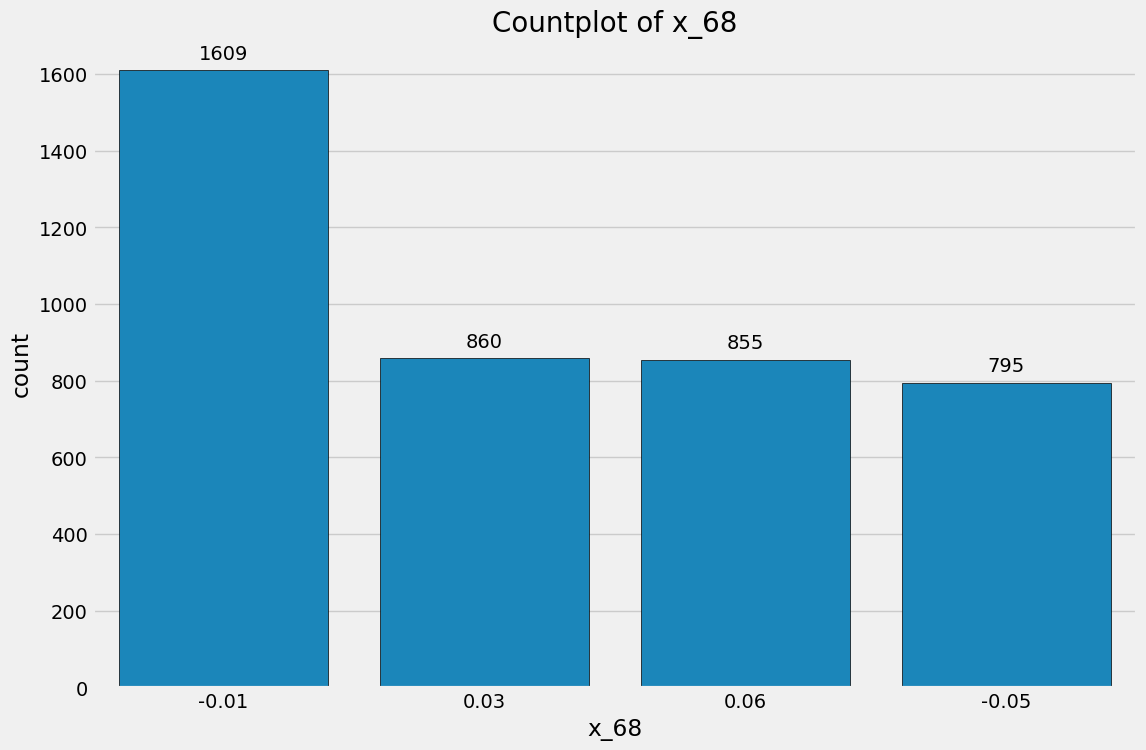

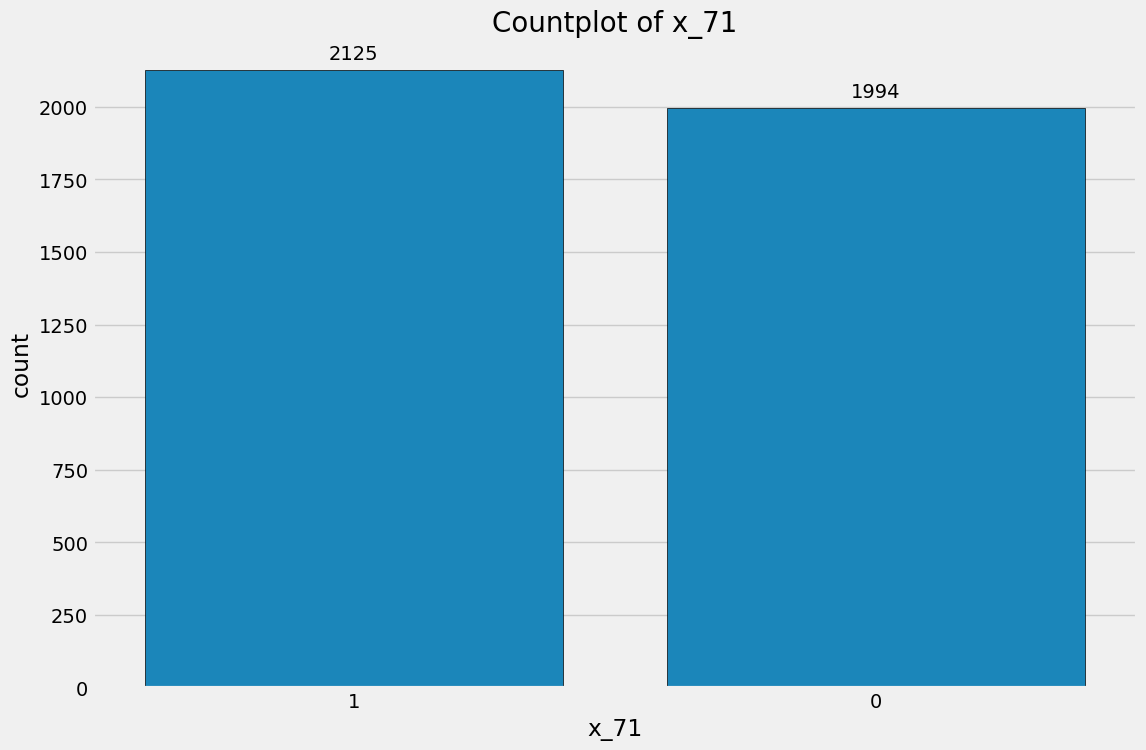

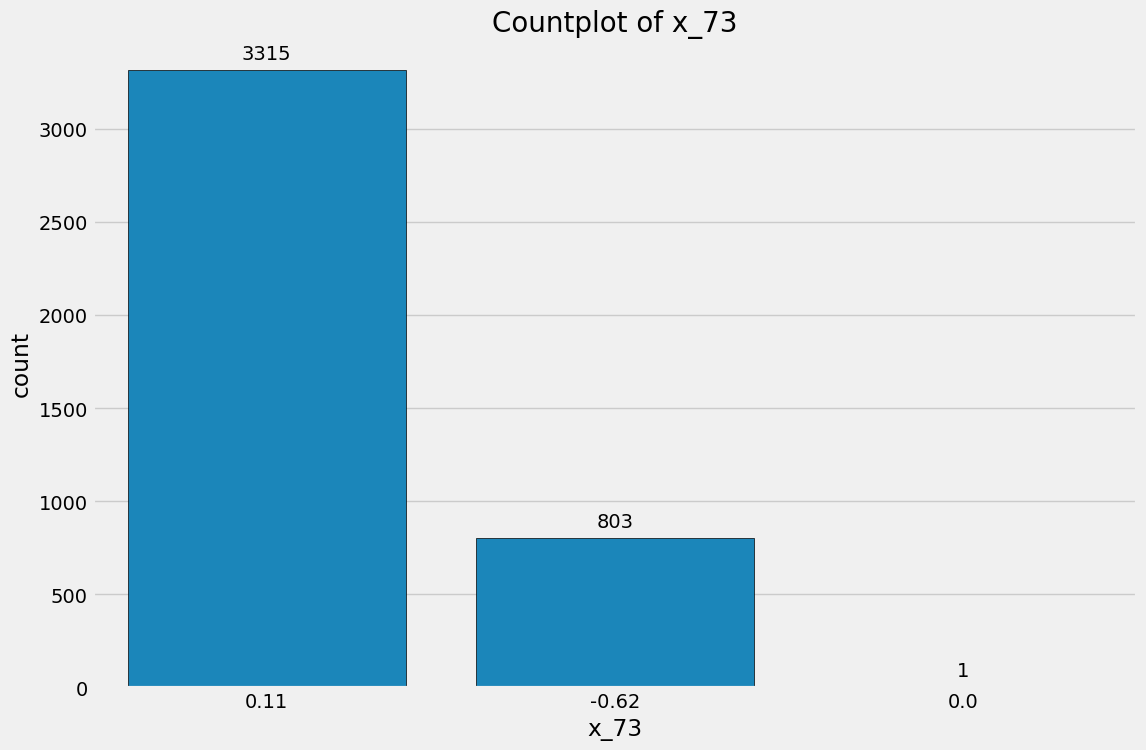

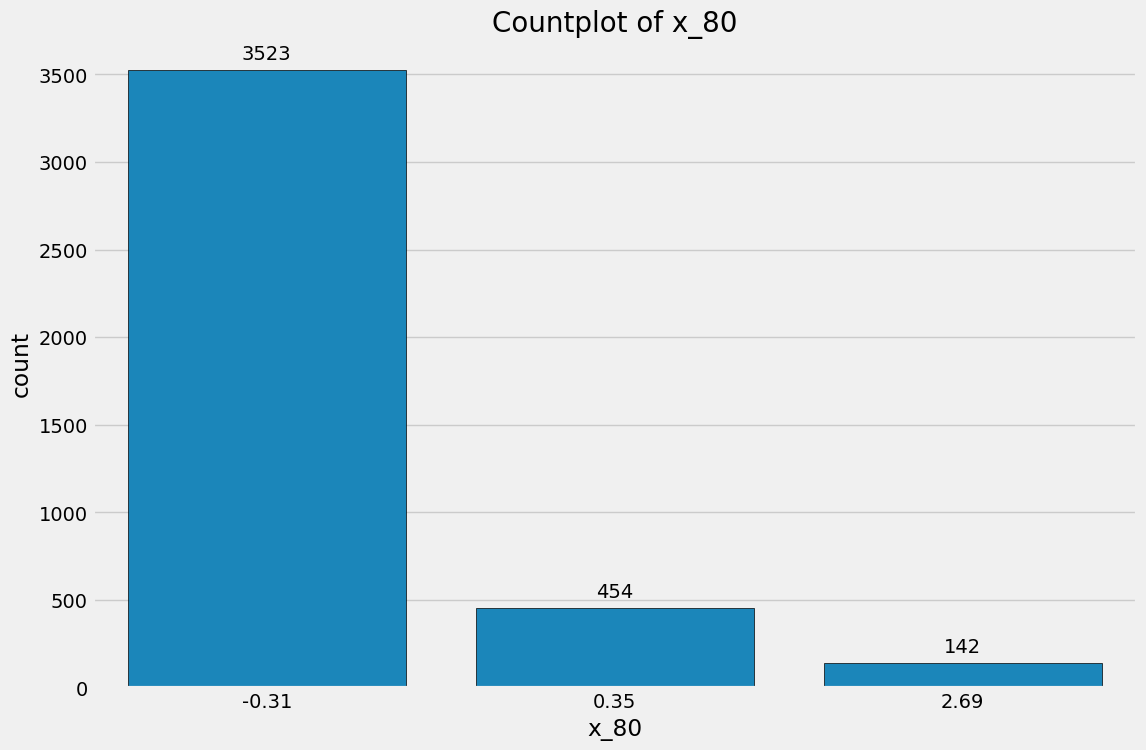

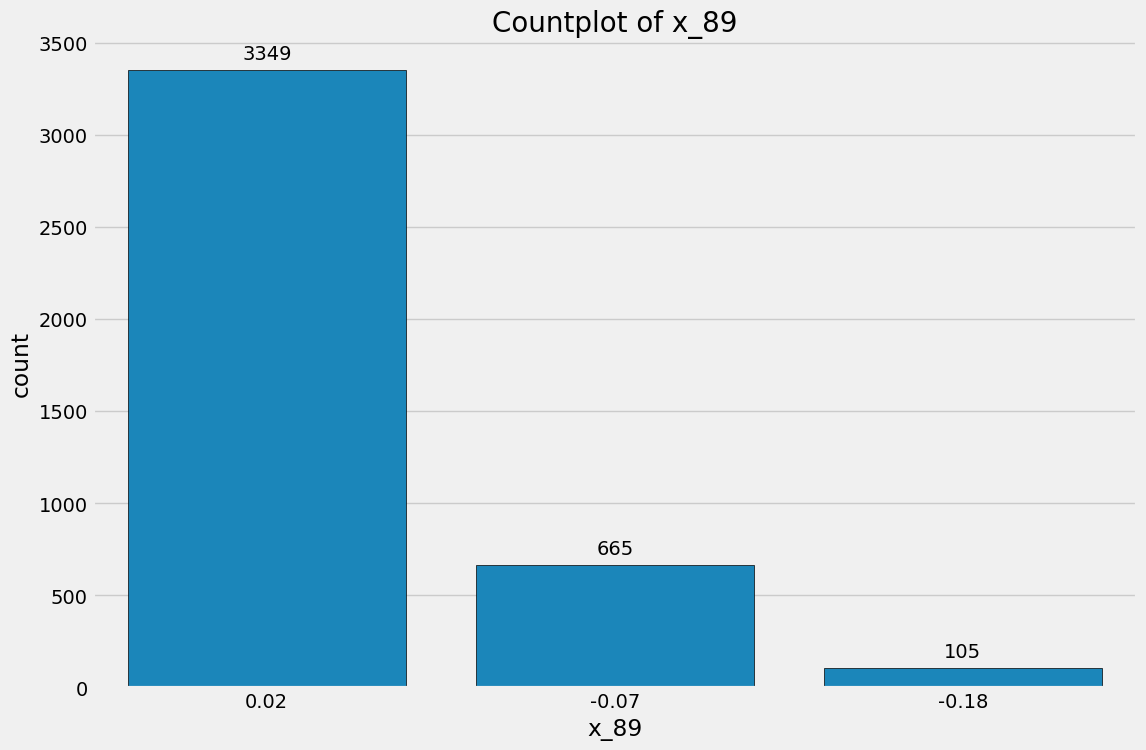

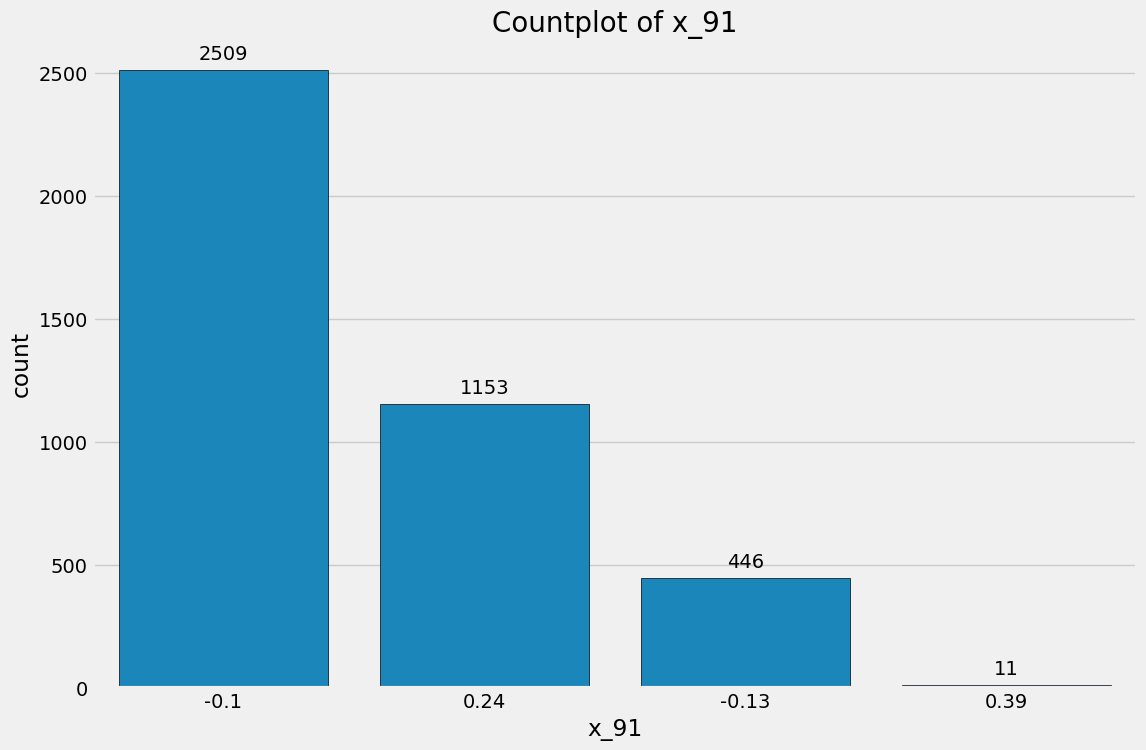

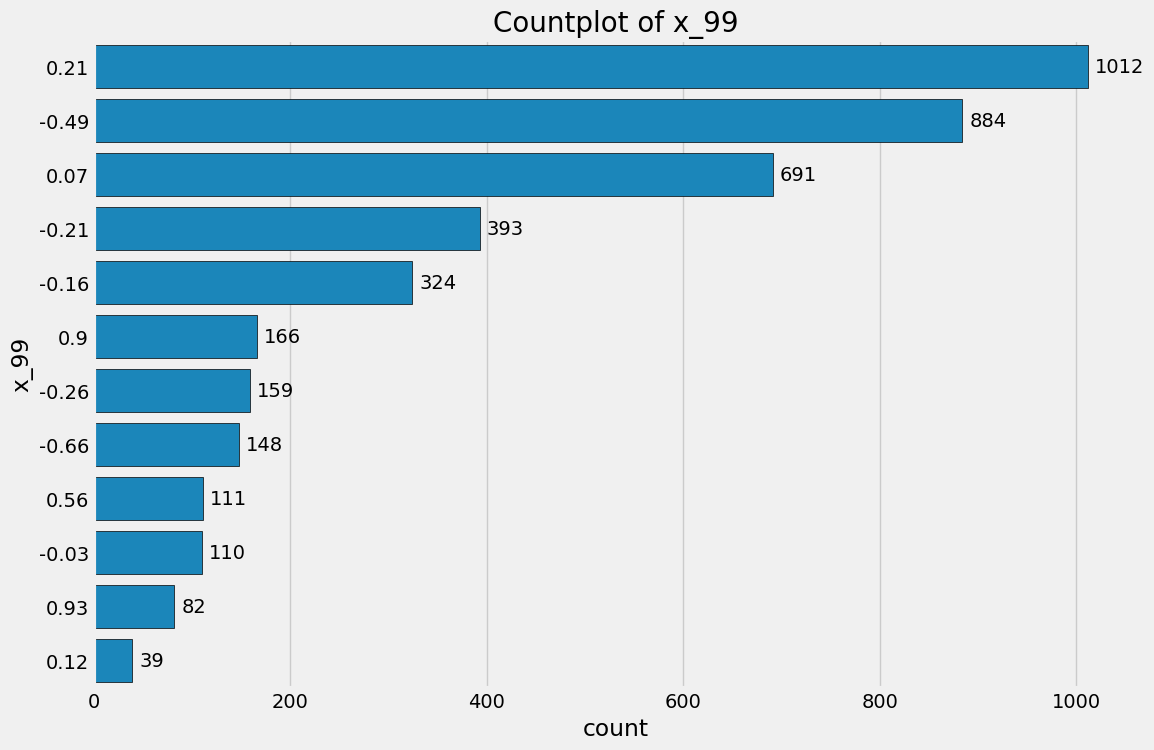

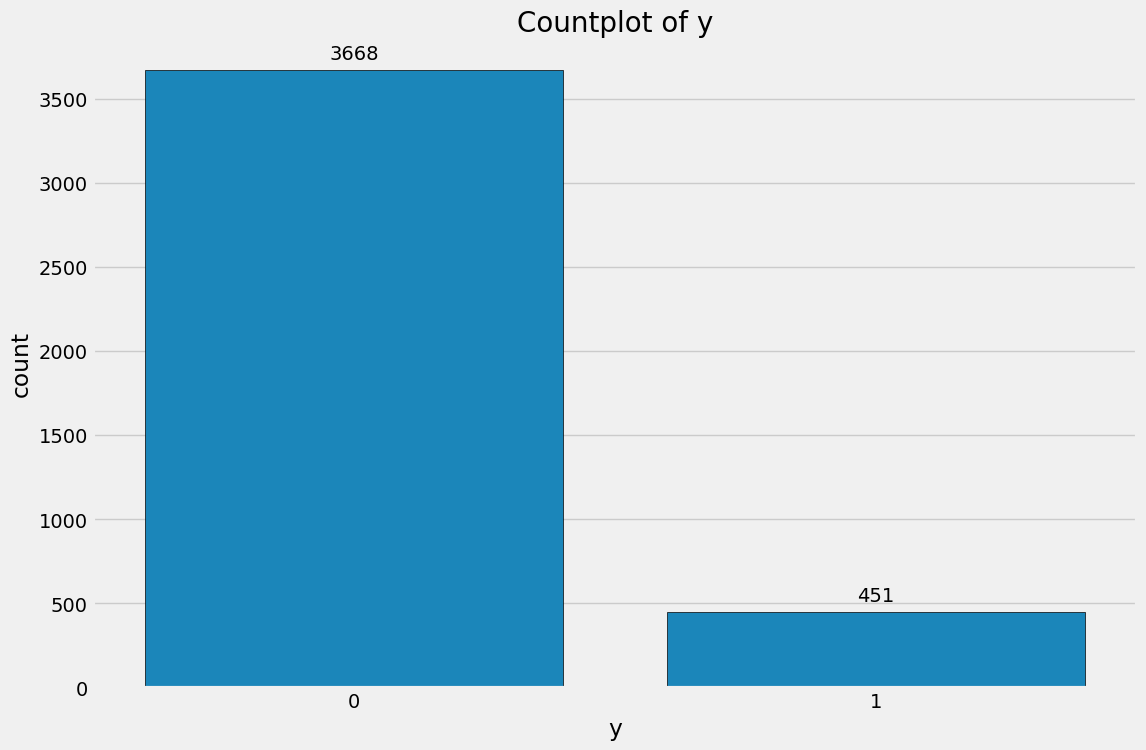

In [4]:
TARGET = 'y'
X = data.loc[:, data.columns != TARGET]
y = data[TARGET]
fast_eda(data,target = TARGET)

# Observations 

1. The data has total 41 columns including 40 features and 1 target column 'y' and 4119 rows
2. The dataset does not contain any NaN or Null values
3. The mean,median and standard deviation varies a lot across features therefore we must consider scaling the values before using various ml classification algorithms
4. The dataset is highly imbalanced with 89% of data samples belong to class '0' only
5. Some features like 'x_8' can distinctively identify the target variable y in two separate classes and has high coorelation with it


Features with Continous values  ['x_33', 'x_38', 'x_45', 'x_55', 'x_57', 'x_62', 'x_68', 'x_73', 'x_80', 'x_89', 'x_91', 'x_99']


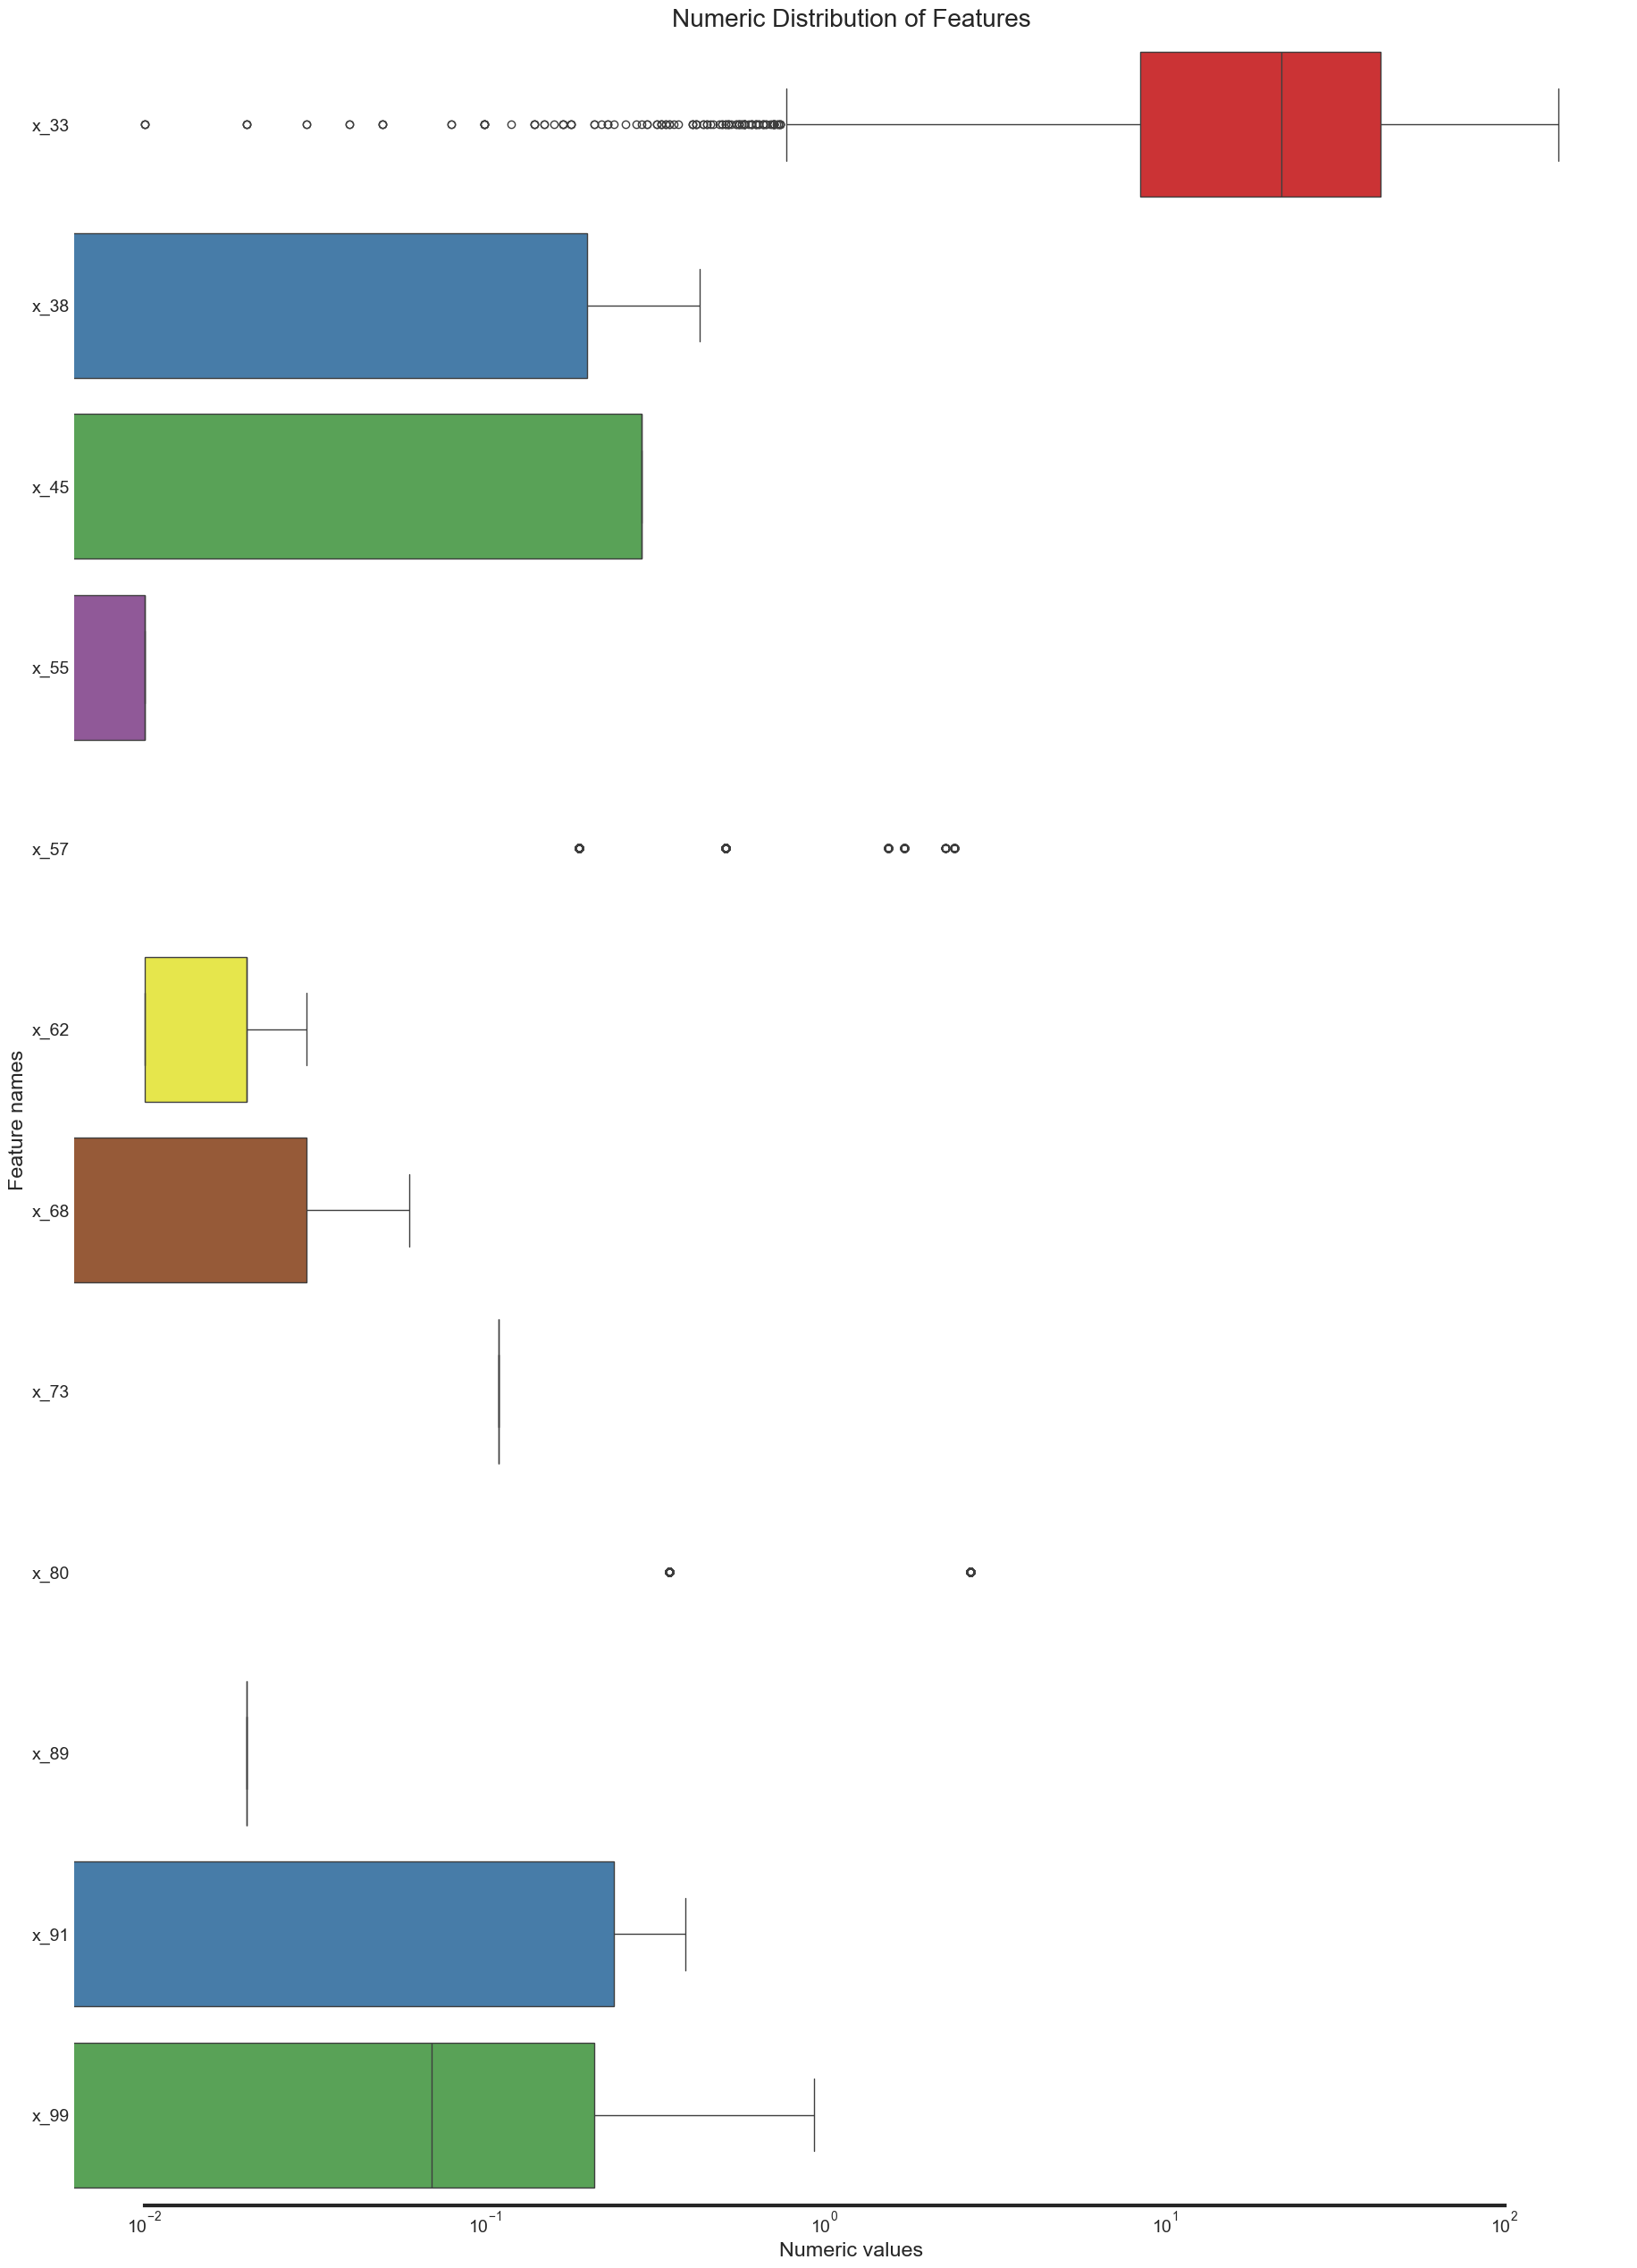

In [5]:
# code to prepare the box plot for all numeric features
numeric_dtypes = ['float16', 'float32', 'float64']
numeric = []
for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        numeric.append(i)

print("Features with Continous values ",numeric)
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 30))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

# Observations

1. Some numerical values are behaving like categorical values only like 'x_89','x_80','x_73' and 'x_57'
2. Column 'x_33' is having abnormally high number of outlier values


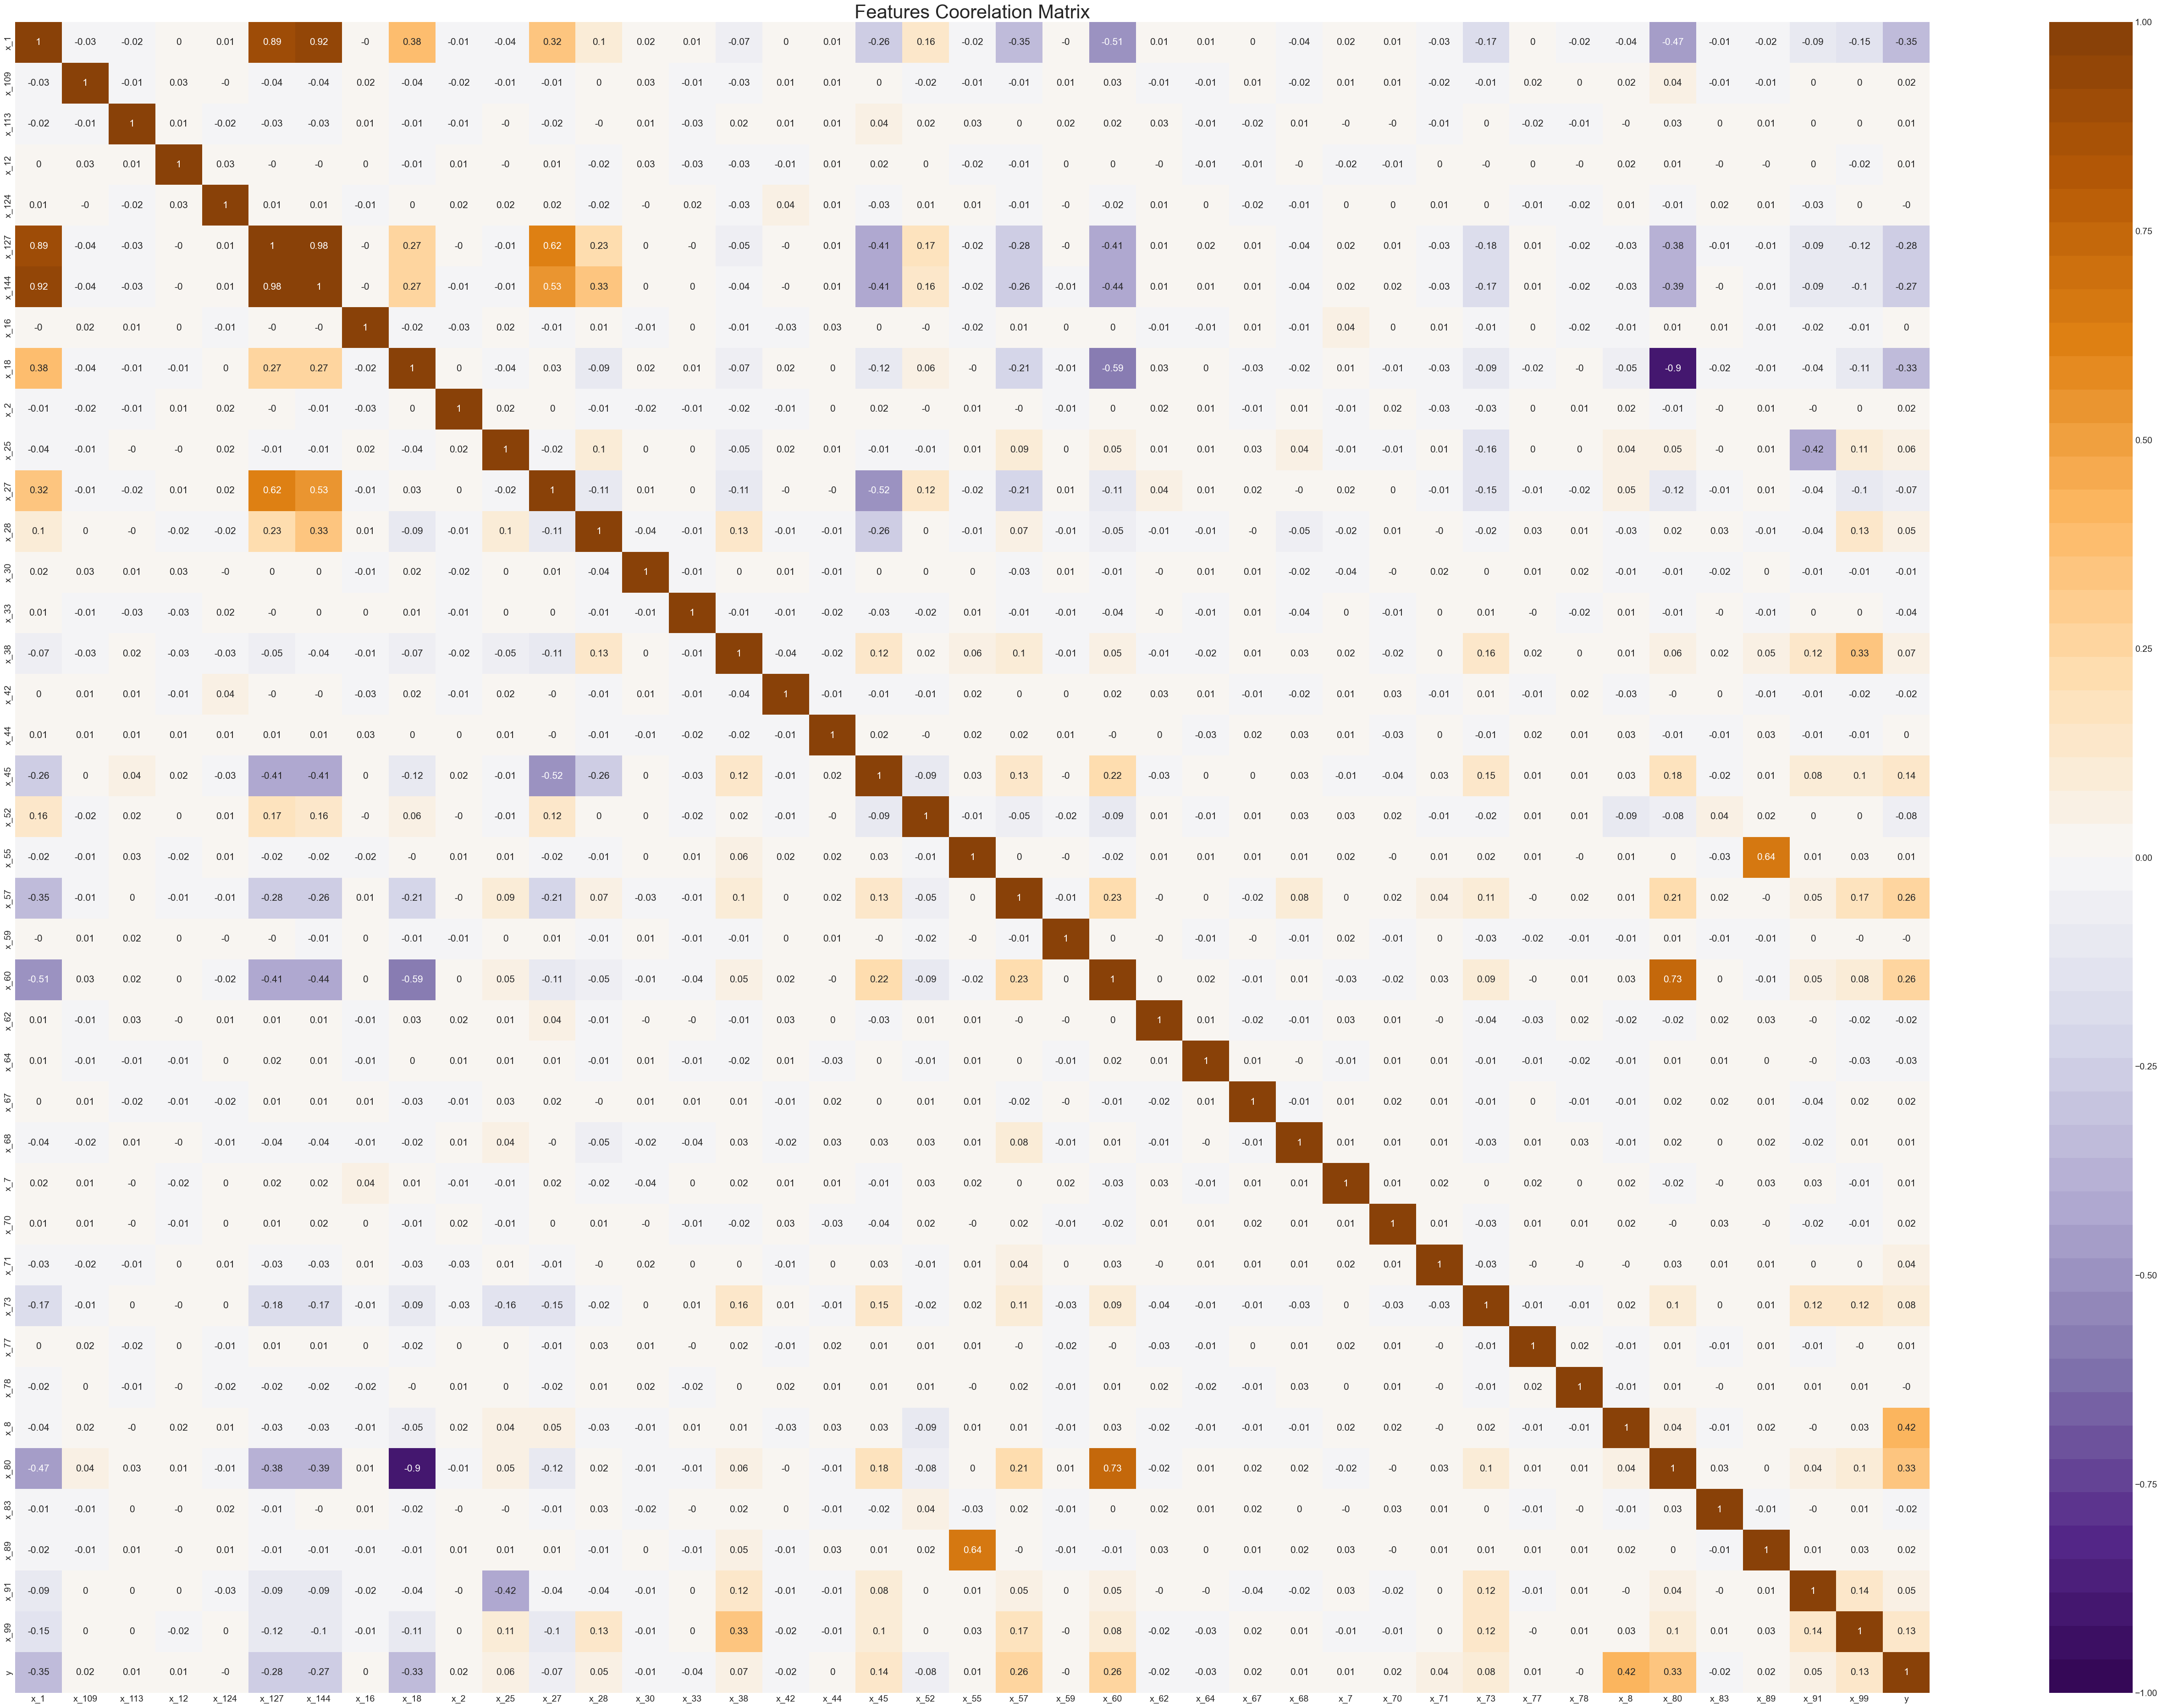

In [6]:
# code to find the coorelation matrix
def coorelation_matrix_plot(data, title = "Features Coorelation Matrix", height = 45, width = 60):
    cor_mat = round(data.corr(method ="pearson"), 2)
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(cor_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    plt.savefig("coorelation_fig.png")
    plt.show()
    
coorelation_matrix_plot(data, title = "Features Coorelation Matrix")

In [7]:
# code to get top coorelations pair from the table above the threshold=0.80
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(method='pearson').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations Above Threshold:",80)
print(get_top_abs_correlations(data, 20))

Top Absolute Correlations Above Threshold: 80
x_127  x_144    0.978813
x_1    x_144    0.918278
x_18   x_80     0.900313
x_1    x_127    0.888620
x_60   x_80     0.727971
x_55   x_89     0.644478
x_127  x_27     0.615190
x_18   x_60     0.587941
x_144  x_27     0.529535
x_27   x_45     0.524482
x_1    x_60     0.514623
       x_80     0.470421
x_144  x_60     0.440471
x_8    y        0.418565
x_25   x_91     0.416228
x_127  x_60     0.411824
x_144  x_45     0.411570
x_127  x_45     0.410837
x_144  x_80     0.391444
x_127  x_80     0.383305
dtype: float64


# Observations

1. The data contains highly coorelated values as well
2. There should be only one amoung the feature column pairs having very high coorelated values as it just results in increase in dimensionality without any significant addition to information contained in them

# Approach

We find the top 20 features by finding the elbow point(the point where adding more components does not significantly increase accuracy of the model) of 'explained_variance' value got by PCA 

1. We train a Logistic Regression model and calculate the accuracy for variance captured by principal components,to assess the performance of Logistic Regression models with increasing variance of principal components obtained using PCA.

2. We smooth out the fluctuations and highlight trends in the accuracy values using a moving average(calculated using the np.convolve function with a window of size window_size) on the accuracies obtained from the train_logistic_regression method. 

3. We identify the elbow point by determining the index where the smoothed accuracies are maximized. This index represents the optimal value of variance explained, obtained by finding the maximum value in the smoothed accuracies array. Subsequently, the cumulative explained variance at this index is designated as the **elbow_point_variance**.

# Initialise classes

In [8]:
class FeatureSelectorPCA:
    """
    Implements Feature selection using Principal Component Analysis (PCA) and Logistic Regression.

    Parameters:
    - X: DataFrame, input features
    - y: Series, target labels

    Methods:
    - select_top_features(num_components): Select the top features based on PCA analysis.
    - train_logistic_regression(num_components): Train a Logistic Regression model and calculate accuracy for a given number of components.
    """
    
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def select_top_features(self, num_components):
        """
        Select the top features based on PCA analysis.

        Parameters:
        - num_components: int, number of components for PCA

        Returns:
        - top_features: array, names of the top features
        """
        pca = PCA(n_components=num_components)
        X_pca = pca.fit_transform(self.X)

        # Get the loading scores for each original feature
        loading_scores = pd.DataFrame(pca.components_, columns=self.X.columns)

        # Calculate the importance of each feature in the PCA space (using the squared loading scores)
        feature_importance = loading_scores.apply(lambda x: sum(x ** 2), axis=0)

        # Get the names of the top 20 features based on importance in PCA space
        top_features = pd.DataFrame(feature_importance).sort_values(by=0)[:20].index

        return np.sort(top_features)

    def train_logistic_regression(self, num_components):
        """
        Train a Logistic Regression model and calculate accuracy for a given number of components.

        Parameters:
        - num_components: int, number of components for PCA

        Returns:
        - accuracy: float, accuracy of the model
        """
        pca = PCA(n_components=num_components, random_state=0)
        X_pca = pca.fit_transform(self.X)

        # Split the data into training and testing sets
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_pca, self.y, test_size=0.2, random_state=0)

        # Train a Logistic Regression model
        model = LogisticRegression(random_state=0)
        model.fit(X_train_split, y_train_split)

        # Make predictions and calculate accuracy
        y_pred = model.predict(X_test_split)
        accuracy = accuracy_score(y_test_split, y_pred)

        return round(accuracy, 3)

class Pipeline:
    """
     Implements data preprocessing, feature selection using Principal Component Analysis (PCA), and saves result.

    Attributes:
    - df: DataFrame, input data
    - y_train: Series, target labels
    - X_train: DataFrame, input features

    Methods:
    - __init__(data_path): Initializes the Pipeline object by reading input data from a CSV file.
    - preprocess_data(): Preprocesses data by dropping unnecessary columns, separating target variable and features, and standardizing features.
    - save_result(selected_features, output_path): Saves the results, including selected features, to a CSV file.
    - run_pipeline(output_path, window_size=10): Runs the entire pipeline, including PCA, Logistic Regression, and result saving.


    """
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)

    def preprocess_data(self):
        # Drop the unnecessary column
        self.df = self.df.drop(['Unnamed: 0'], axis=1)

        # Separate target variable and features
        self.y_train = self.df['y']
        self.X_train = self.df.iloc[:, :-1]

        # Standardize the features using StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.X_train)

        return X_scaled, self.y_train

    def save_result(self, selected_features, output_path):

        df = pd.DataFrame({'Variables': self.X_train.columns})
        df['Mark'] = 0
        df.loc[df['Variables'].isin(selected_features), 'Mark'] = 1

        df.to_csv(output_path, index=False)
        print(f"Results saved to {output_path}")
        
    def run_pipeline(self, output_path, window_size=10):
        X_scaled, y_train = self.preprocess_data()

        # Initialize FeatureSelectorPCA
        feature_selector = FeatureSelectorPCA(pd.DataFrame(X_scaled, columns=self.X_train.columns), y_train)

        # Perform PCA on the standardized data
        pca = PCA()
        X_pca = pca.fit_transform(X_scaled)

        # Get the cumulative explained variance ratio
        cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

        # Train a Logistic Regression model and calculate accuracy for each number of components
        accuracies = [feature_selector.train_logistic_regression(i) for i in range(1, len(cumulative_variance_ratio) + 1)]

        # Smooth the accuracies using a moving average
        smoothed_accuracies = np.convolve(accuracies, np.ones(window_size) / window_size, mode='valid')
        elbow_point_variance = round(cumulative_variance_ratio[list(smoothed_accuracies).index(max(list(smoothed_accuracies)))], 2)
        
        # Select the top features based on the optimal number of components
        selected_features = feature_selector.select_top_features(elbow_point_variance)
        print(selected_features)
        # print(all(selected_features == feature_selector.select_top_features(0.9)))
        self.save_result(selected_features, output_path)

# Saving Results


In [9]:
pipeline = Pipeline('Dataset.csv')
pipeline.run_pipeline(output_path="AbhinavKJha_IITH_VAR.csv")

['x_1' 'x_127' 'x_144' 'x_18' 'x_25' 'x_27' 'x_28' 'x_38' 'x_45' 'x_52'
 'x_55' 'x_57' 'x_60' 'x_68' 'x_73' 'x_8' 'x_80' 'x_89' 'x_91' 'x_99']
Results saved to AbhinavKJha_IITH_VAR.csv


# Other Expriments and Appraoches 

It includes the code of other experiments and approaches tried on to obtain various results on the leaderboard

In [10]:
class DatasetLoader:
    def __init__(self, dataset_path, target_column, exclude_columns=None):
        self.x_columns = None
        self.df = pd.read_csv(dataset_path)
        self.target_column = target_column
        self.exclude_columns = exclude_columns
        self.X = None
        self.y = None

    def load_dataset(self, apply_scaling=False, remove_high_unique_cols=True, unique_threshold=100):
        X = self.df.drop(columns=self.exclude_columns + [self.target_column]) \
            if self.exclude_columns else self.df.drop(columns=[self.target_column])
        y = self.df[self.target_column]
        self.x_columns = X.columns.copy()

        if apply_scaling:
            X = self._apply_scaling(X)

        if remove_high_unique_cols:
            X = self._remove_high_unique_columns(X, unique_threshold)

        self.X, self.y = X, y
        return X, y

    @staticmethod
    def _apply_scaling(X):
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        return pd.DataFrame(X_scaled, columns=X.columns)

    @staticmethod
    def _remove_high_unique_columns(X, threshold):
        high_unique_cols = X.columns[X.nunique() > threshold]
        high_unique_cols = list(set(high_unique_cols) - {'x_8'})
        # high_unique_cols = list(set(high_unique_cols))

        X_filtered = X.drop(columns=high_unique_cols)
        print(f"Columns with more than {threshold} unique values removed: {high_unique_cols}")
        return X_filtered

class ResultSaver:
    @staticmethod
    def save_result(X, top_features_dict, output_path, feature_selector, dataset_loader,save_to_csv=False):

        all_features = dataset_loader.x_columns
        df = pd.DataFrame({'Variables': all_features})

        for technique, top_features in top_features_dict.items():
            print(technique, ":", feature_selector.calculate_accuracy(top_features, LogisticRegression(solver='liblinear')))
            df[technique] = 0
            df.loc[df['Variables'].isin(top_features), technique] = 1
        if save_to_csv:
            df.to_csv(output_path, index=False)
            print(f"Results saved to {output_path}")

In [11]:

class FeatureSelector:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def select_top_features_f_classif(self, k):
        return self._select_top_features(k, f_classif)

    def select_top_features_mutual_info(self, k):
        return self._select_top_features(k, mutual_info_classif)

    def select_top_features_chi2(self, k):
        return self._select_top_features(k, chi2)

    def select_top_features_recursive_elimination(self, k):
        model = RandomForestClassifier(max_depth=40, max_features=40, n_estimators=300)
        selector = RFE(model, n_features_to_select=k)
        selector = selector.fit(self.X, self.y)

        selected_feature_indices = selector.get_support(indices=True)
        selected_features = self.X.columns[selected_feature_indices]

        return selected_features

    def select_top_features_logistic_regression(self, k):
        model = LogisticRegression()
        selector = RFE(model, n_features_to_select=k)
        selector = selector.fit(self.X, self.y)

        selected_feature_indices = selector.get_support(indices=True)
        selected_features = self.X.columns[selected_feature_indices]

        return selected_features

    def select_top_features_variance_threshold(self, num_features):
        selector = VarianceThreshold()
        X_selected = selector.fit_transform(self.X)
        feature_variances = selector.variances_

        sorted_indices = feature_variances.argsort()[::-1]
        selected_indices = sorted_indices[:num_features]
        selected_features = self.X.columns[selected_indices]

        return selected_features

    def select_top_features_percentile(self, num_features):
        selector = SelectPercentile(score_func=f_classif, percentile=100)
        X_selected = selector.fit_transform(self.X, self.y)
        feature_scores = selector.scores_

        sorted_indices = feature_scores.argsort()[::-1]
        selected_indices = sorted_indices[:num_features]
        selected_features = self.X.columns[selected_indices]

        return selected_features

    def select_top_features_tree_based(self, num_features):
        model = RandomForestClassifier()
        model.fit(self.X, self.y)

        importances = model.feature_importances_

        sorted_indices = importances.argsort()[::-1]
        selected_indices = sorted_indices[:num_features]
        selected_features = self.X.columns[selected_indices]

        return selected_features

    def select_top_features_lasso_cv(self, num_features):
        model = LassoCV(cv=5)
        model.fit(self.X, self.y)

        selected_feature_indices = model.coef_ != 0
        selected_features = self.X.columns[selected_feature_indices]

        if len(selected_features) > num_features:
            sorted_indices = abs(model.coef_).argsort()[::-1]
            selected_indices = sorted_indices[:num_features]
            selected_features = self.X.columns[selected_indices]

        return selected_features

    def select_top_features_linear_svc_rfe(self, k):
        model = LinearSVC(dual=True)
        selector = RFE(model, n_features_to_select=k)
        selector = selector.fit(self.X, self.y)

        selected_feature_indices = selector.get_support(indices=True)
        selected_features = self.X.columns[selected_feature_indices]

        return selected_features

    def select_top_features_select_from_model(self, num_features):
        model = ExtraTreesClassifier()
        selector = SelectFromModel(model, max_features=num_features)
        selector = selector.fit(self.X, self.y)

        selected_feature_indices = selector.get_support(indices=True)
        selected_features = self.X.columns[selected_feature_indices]

        return selected_features

    def _select_top_features(self, k, scoring_function):
        selector = SelectKBest(scoring_function, k=k)
        X_new = selector.fit_transform(self.X, self.y)

        selected_feature_indices = selector.get_support(indices=True)
        selected_features = self.X.columns[selected_feature_indices]

        return selected_features

    def calculate_accuracy(self, selected_features, model):
        X_selected = self.X[selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.2, random_state=3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

    def select_top_features_pca(self, num_components):
        pca = PCA(n_components=num_components)
        X_pca = pca.fit_transform(self.X)

        # Get the loading scores for each original feature
        loading_scores = pd.DataFrame(pca.components_, columns=self.X.columns)

        # Calculate the importance of each feature in the PCA space (using the squared loading scores)
        feature_importance = loading_scores.apply(lambda x: sum(x ** 2), axis=0)
        # Get the names of the top 20 features based on importance in PCA space
        top_features = pd.DataFrame(feature_importance).sort_values(by=0)[:20].index
        
        return top_features


In [12]:
file_path = "All_Approaches_Combined_results.csv"
dataset_loader = DatasetLoader("Dataset.csv", target_column='y', exclude_columns=[
    'Unnamed: 0'])
X, y = dataset_loader.load_dataset(apply_scaling=True)

feature_selector = FeatureSelector(X, y)

# Example usage of different methods:
top_features_pca = feature_selector.select_top_features_pca(20)
top_features_f_classif = feature_selector.select_top_features_f_classif(k=20)
top_features_mutual_info = feature_selector.select_top_features_mutual_info(k=20)
top_features_chi2 = feature_selector.select_top_features_chi2(k=20)
top_features_recursive_elimination_rf = feature_selector.select_top_features_recursive_elimination(k=20)
top_features_logistic_regression = feature_selector.select_top_features_logistic_regression(k=20)
top_features_var = feature_selector.select_top_features_variance_threshold(num_features=20)
top_features_percentile = feature_selector.select_top_features_percentile(num_features=20)
top_features_tree_based = feature_selector.select_top_features_tree_based(num_features=20)
top_features_lasso = feature_selector.select_top_features_lasso_cv(num_features=20)
top_features_linear_svc_rfe = feature_selector.select_top_features_linear_svc_rfe(k=20)
top_features_select_from_model = feature_selector.select_top_features_select_from_model(num_features=20)

best_model = ['x_1', 'x_127', 'x_144', 'x_18', 'x_25', 'x_27', 'x_28', 'x_38',
              'x_45', 'x_52', 'x_55', 'x_57', 'x_60', 'x_68', 'x_73', 'x_8', 'x_80', 'x_89', 'x_91', 'x_99']
top_features_dict = {
    "pca": top_features_pca,
    "f-test": top_features_f_classif,
    "mutual_info": top_features_mutual_info,
    "chi_square": top_features_chi2,
    "rfe-rf": top_features_recursive_elimination_rf,
    "rfe-logistic": top_features_logistic_regression,
    "var": top_features_var,
    "percentile": top_features_percentile,
    "tree_based": top_features_tree_based,
    "lasso": top_features_lasso,
    "svc": top_features_linear_svc_rfe,
    "model": top_features_select_from_model,
    "best_model": best_model
}

result_saver = ResultSaver()
result_saver.save_result(X, top_features_dict, file_path, feature_selector, dataset_loader,save_to_csv=False)

Columns with more than 100 unique values removed: ['x_124', 'x_7', 'x_83', 'x_77', 'x_59', 'x_12', 'x_70', 'x_44', 'x_33']
pca : 0.9077669902912622
f-test : 0.9089805825242718
mutual_info : 0.9065533980582524
chi_square : 0.9077669902912622
rfe-rf : 0.9077669902912622
rfe-logistic : 0.9077669902912622
var : 0.8907766990291263
percentile : 0.9089805825242718
tree_based : 0.9089805825242718
lasso : 0.9065533980582524
svc : 0.9077669902912622
model : 0.9077669902912622
best_model : 0.9077669902912622
